<a href="https://colab.research.google.com/github/ErickEA1995/Projects/blob/main/DynamicModelingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Conditions:
b0:0 s0:0 E0:0


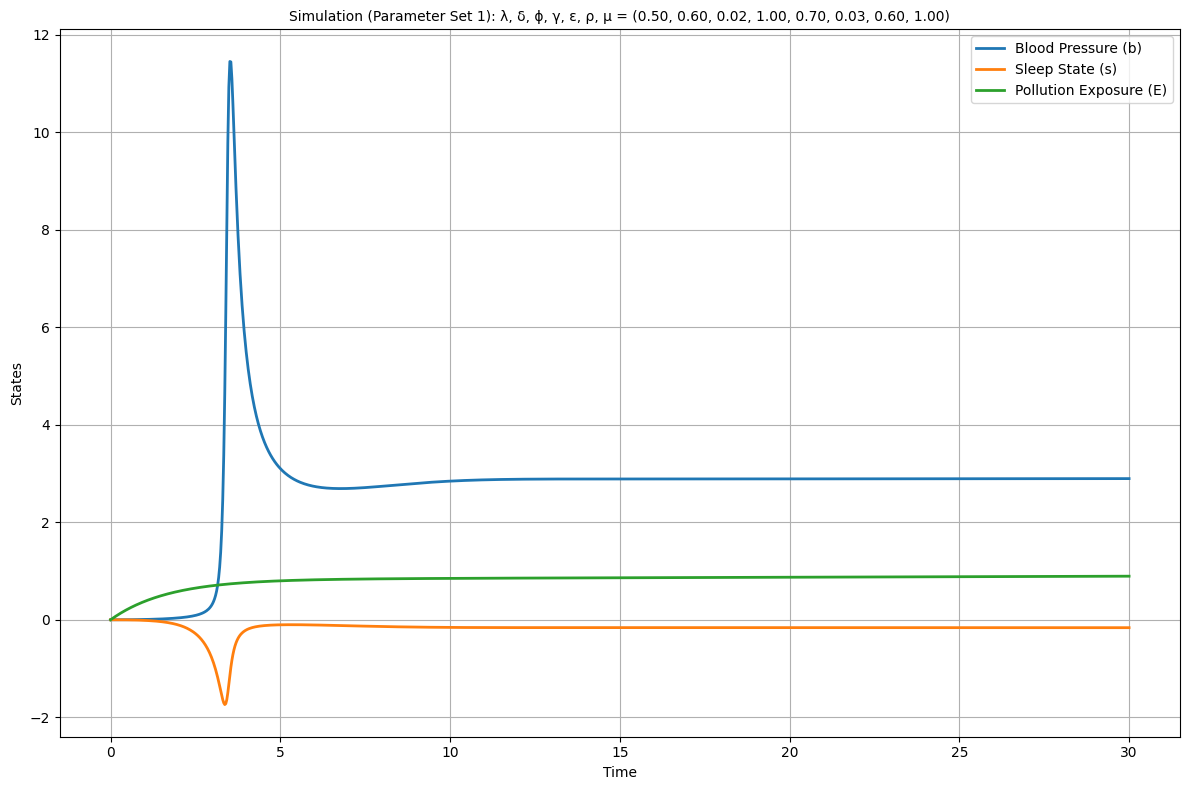

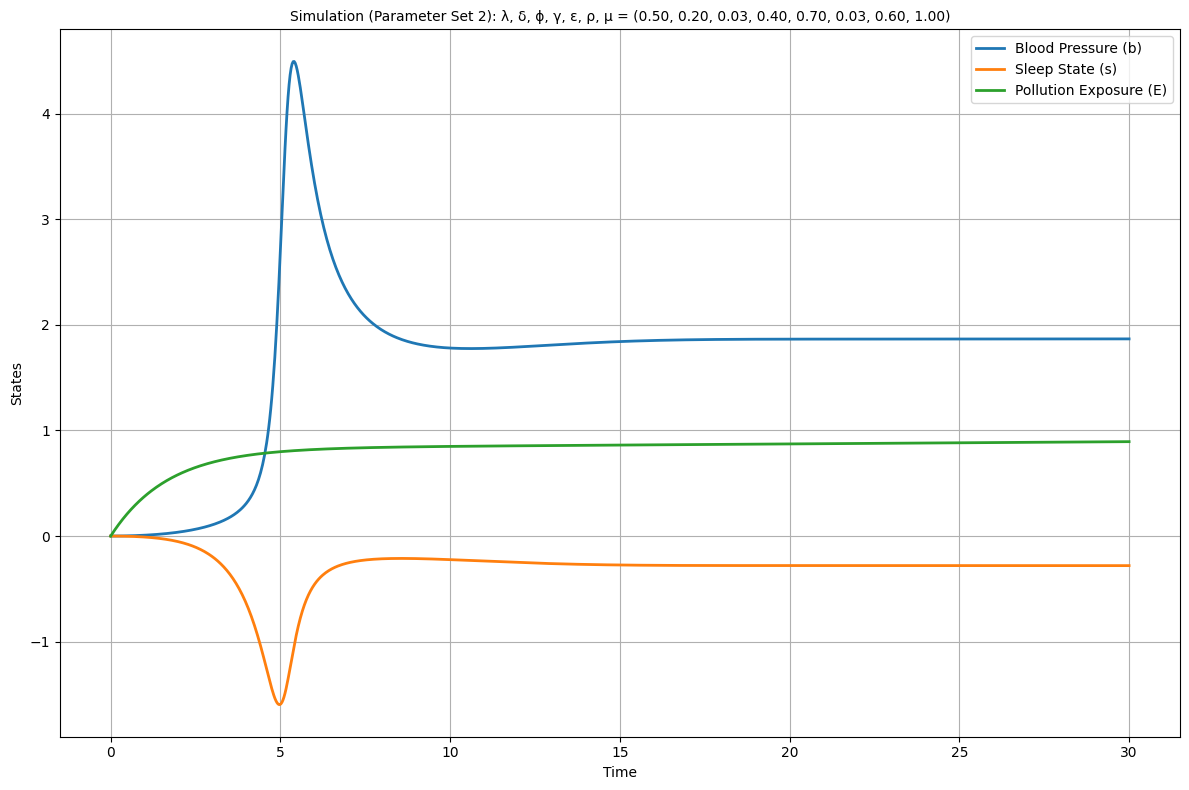

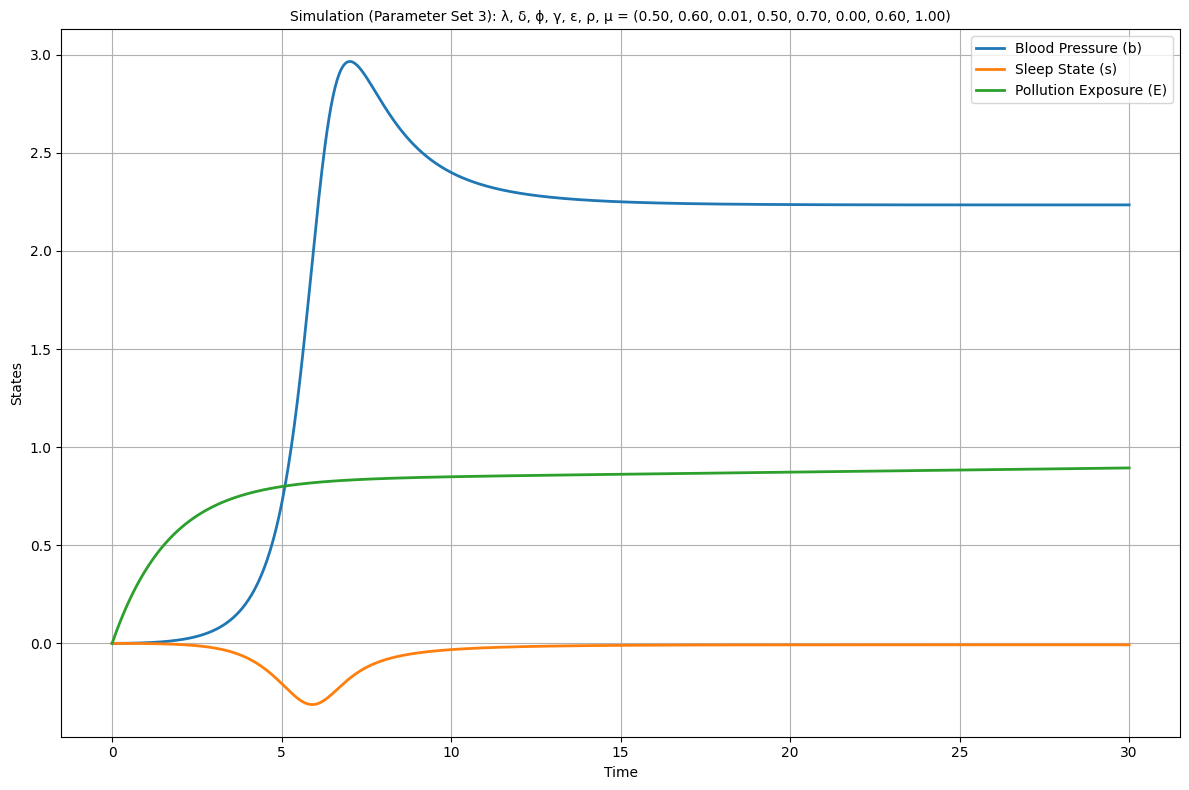

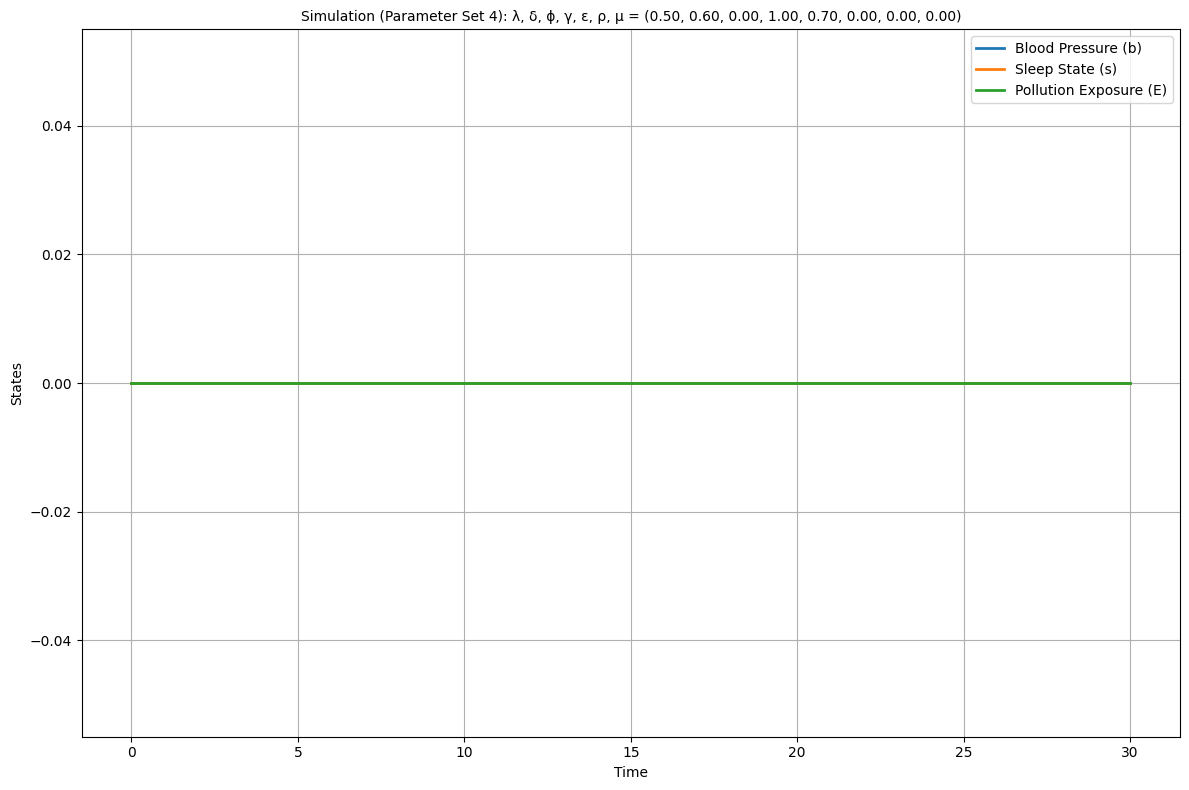

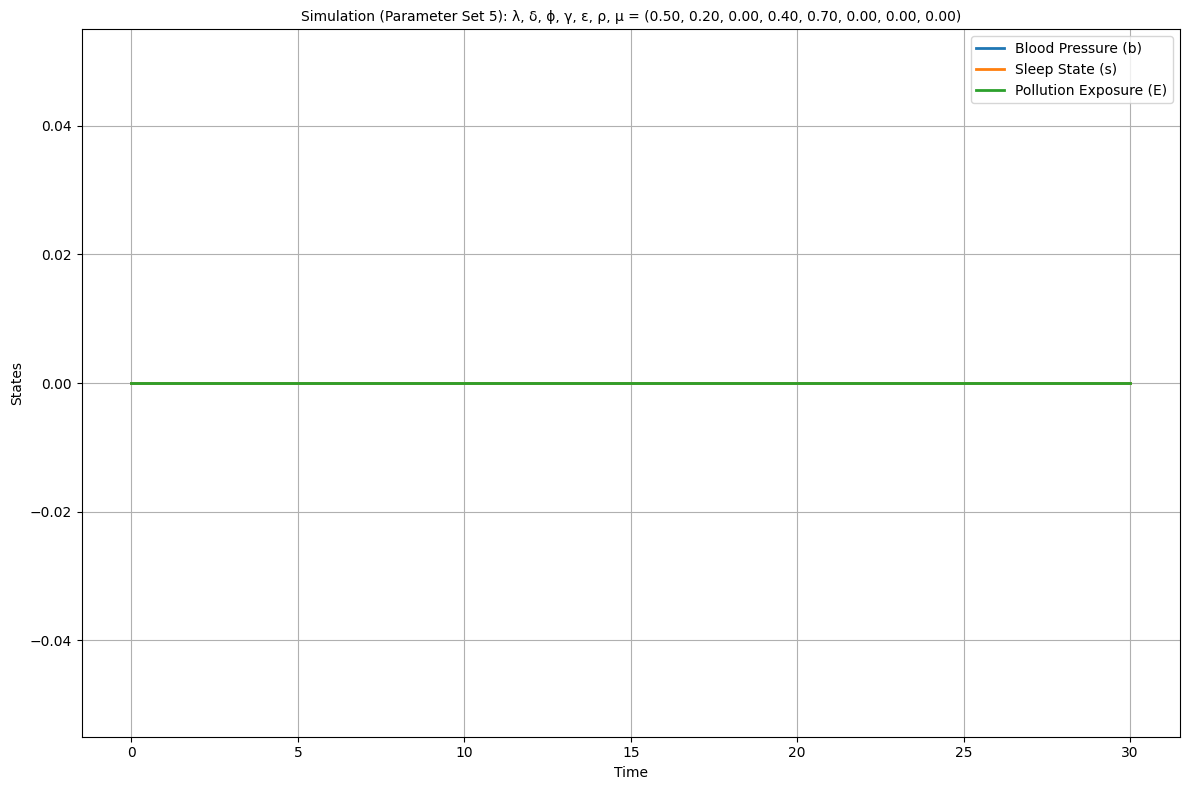

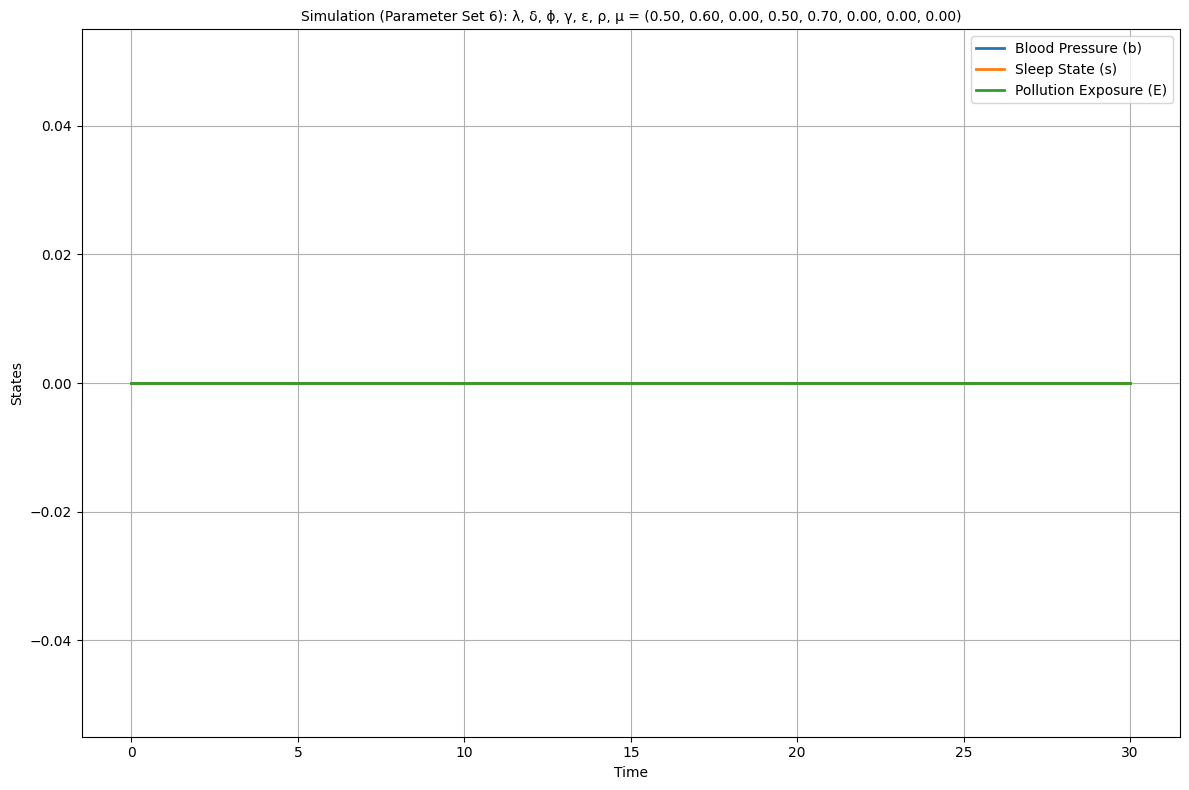

Initial Conditions:
b0:0.3 s0:0.3 E0:0


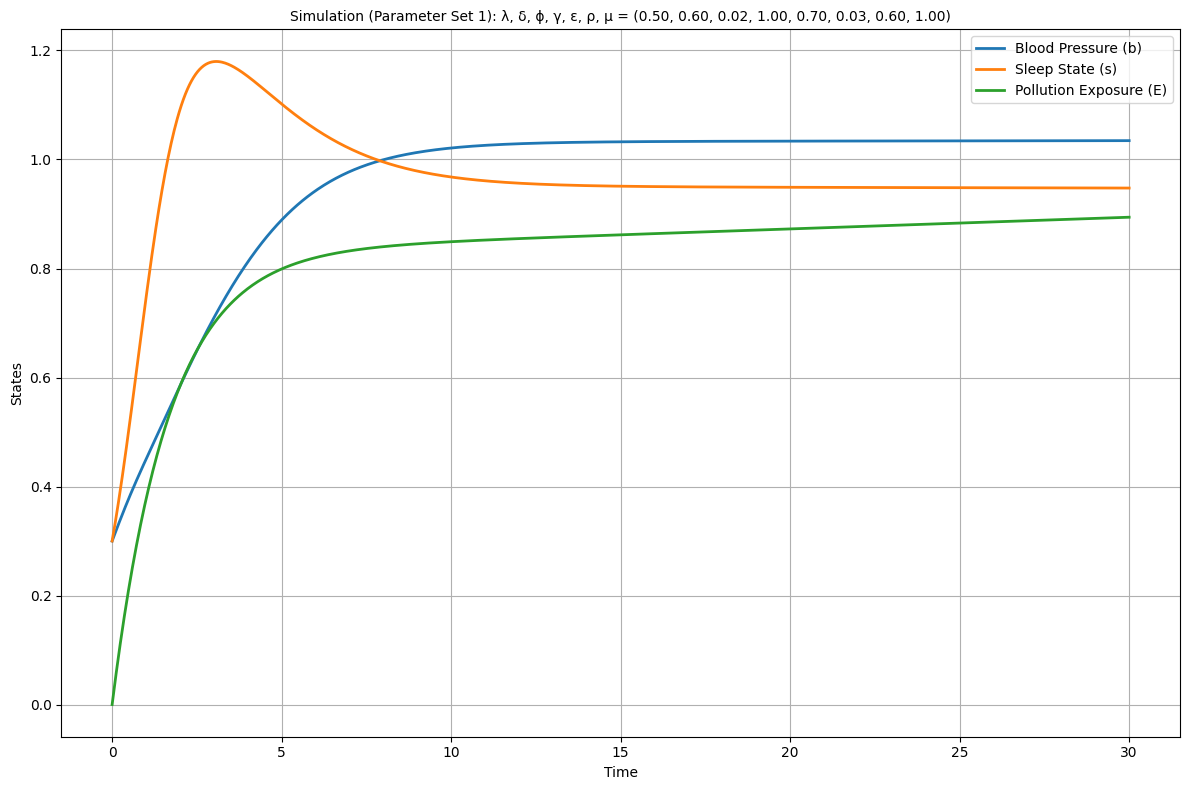

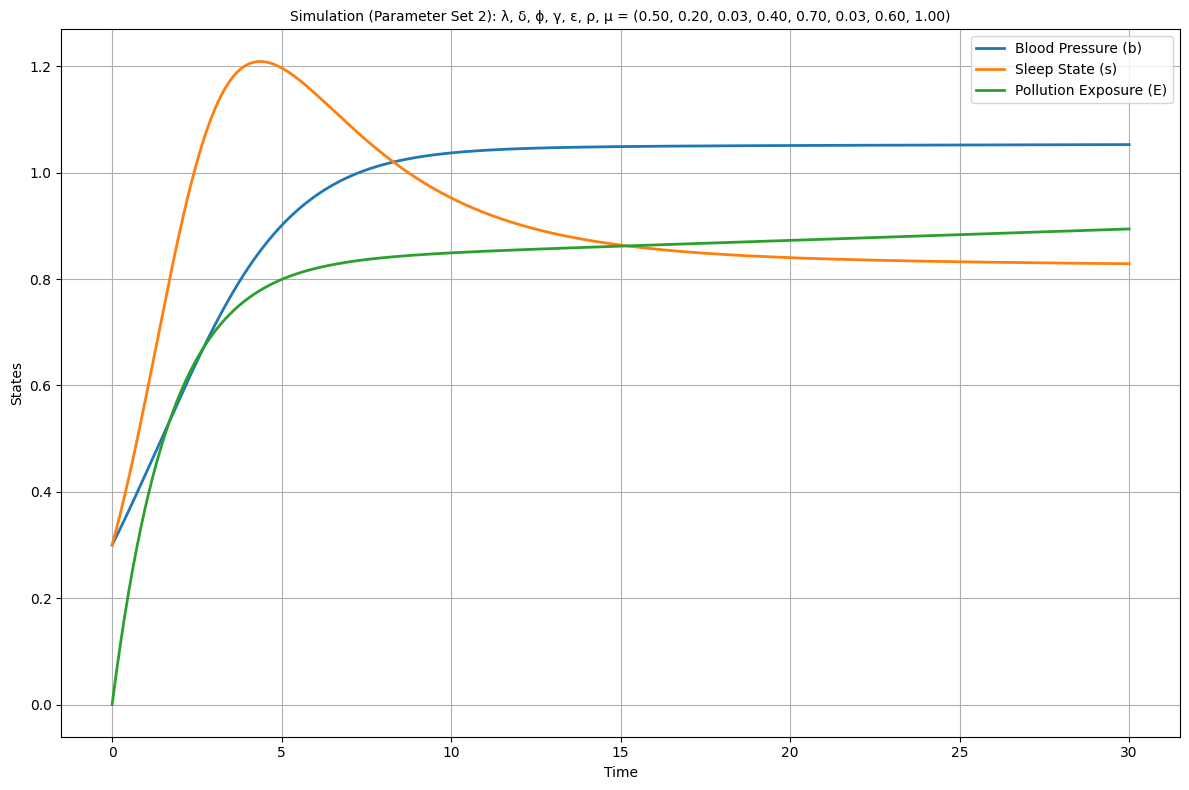

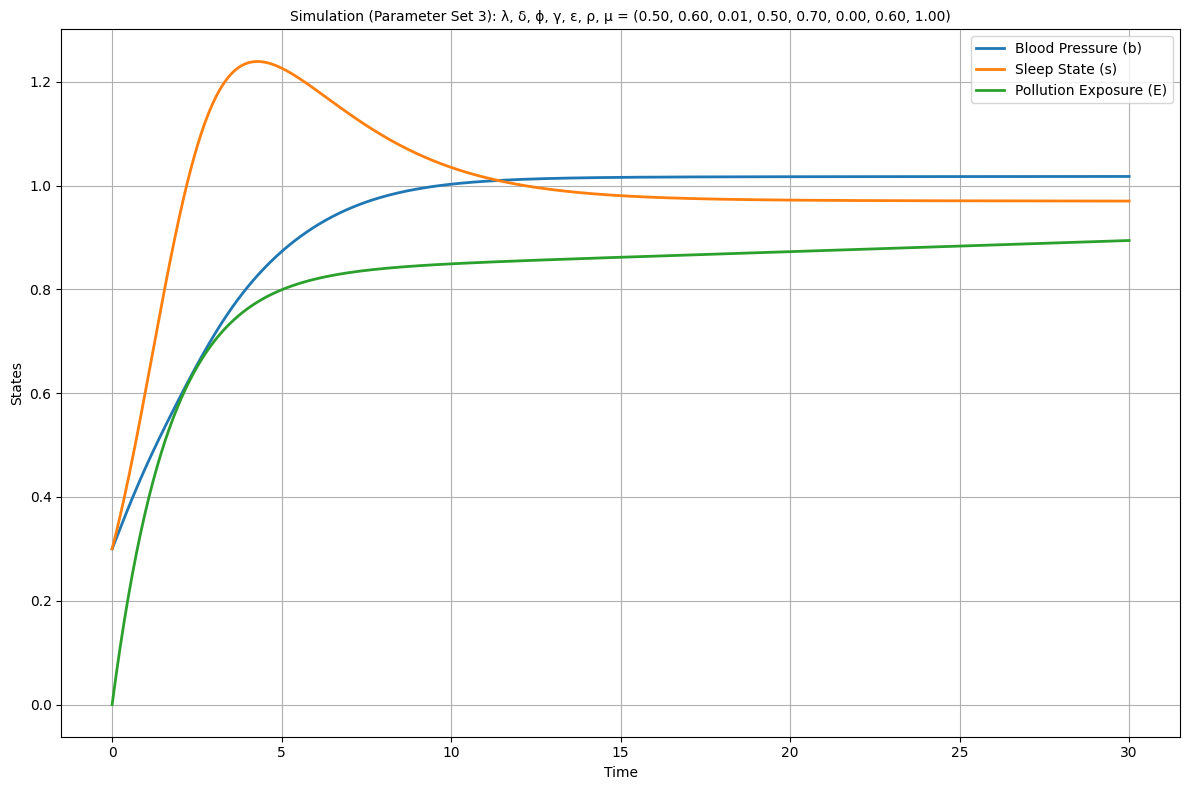

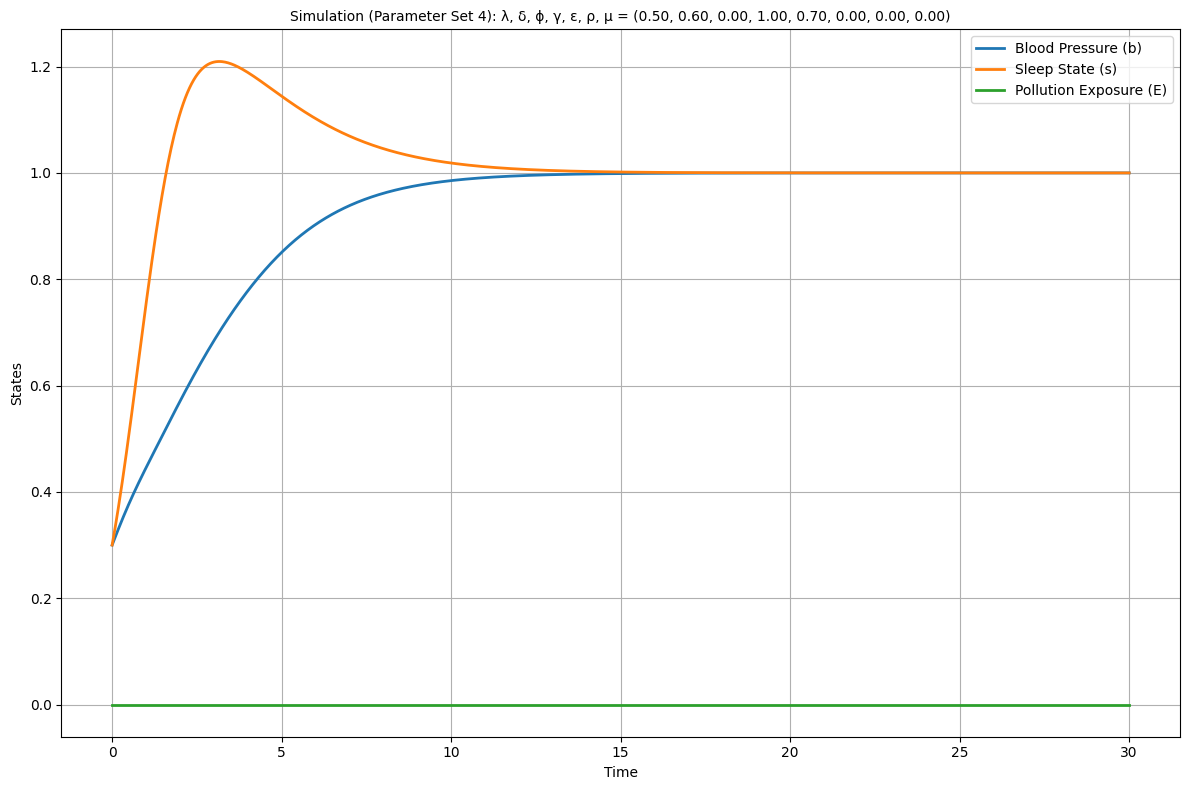

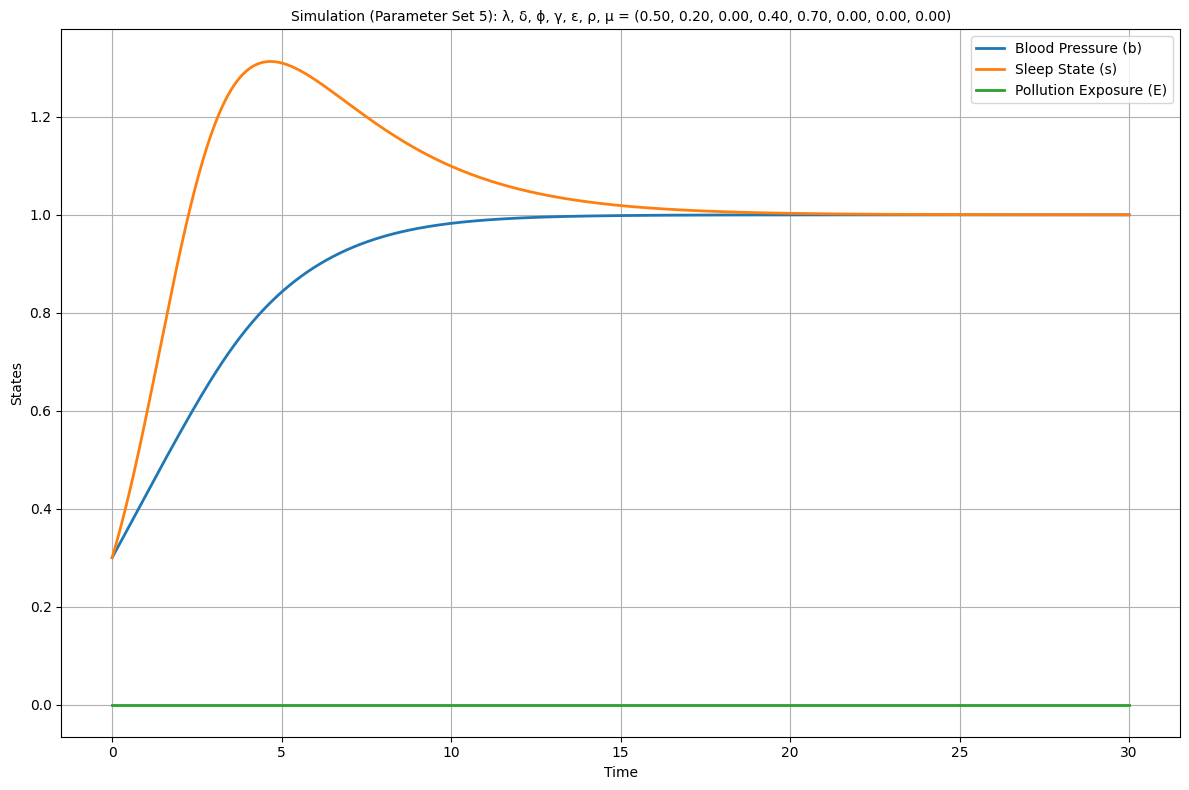

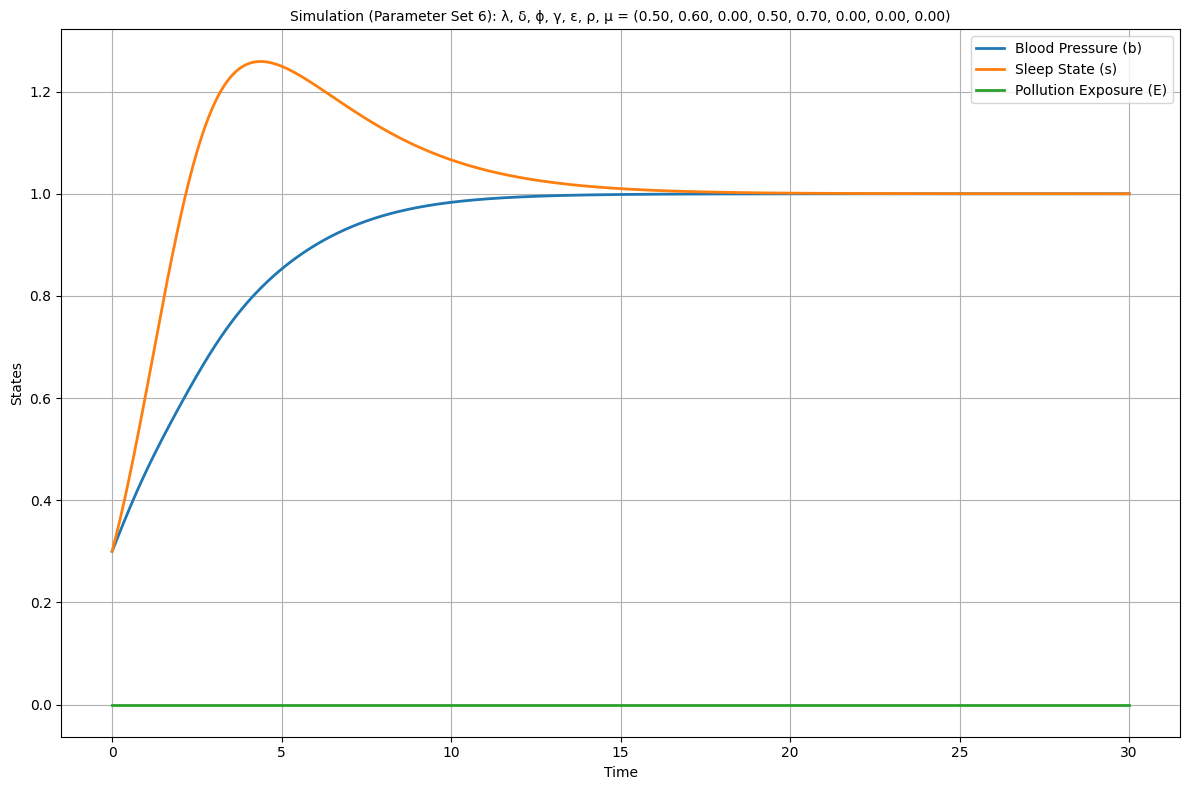

Initial Conditions:
b0:0.3 s0:0.3 E0:0.1


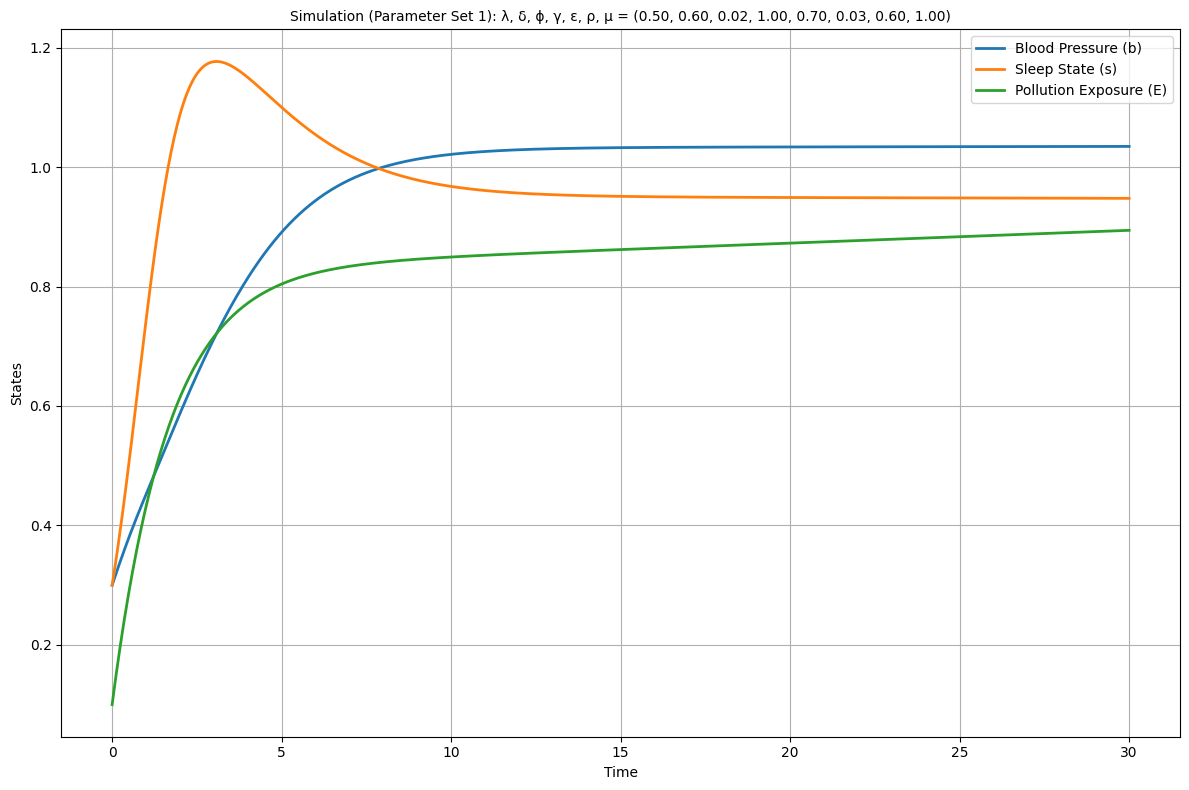

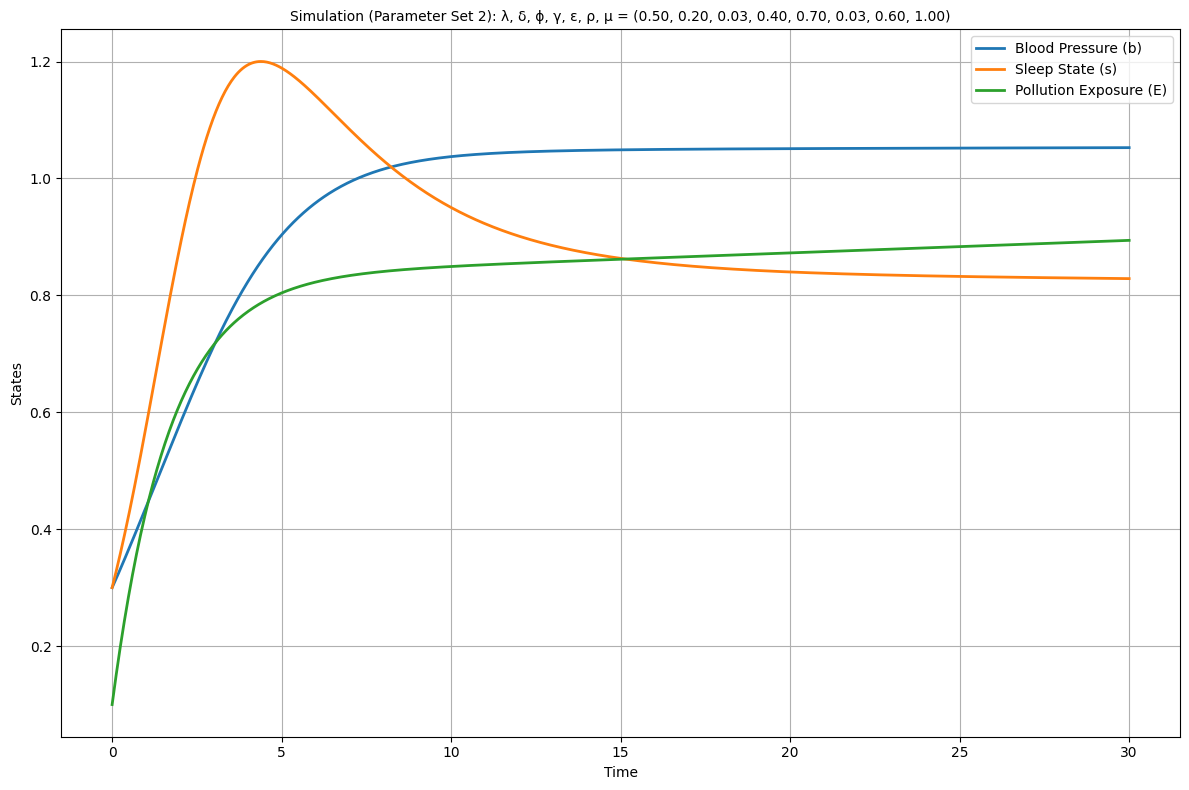

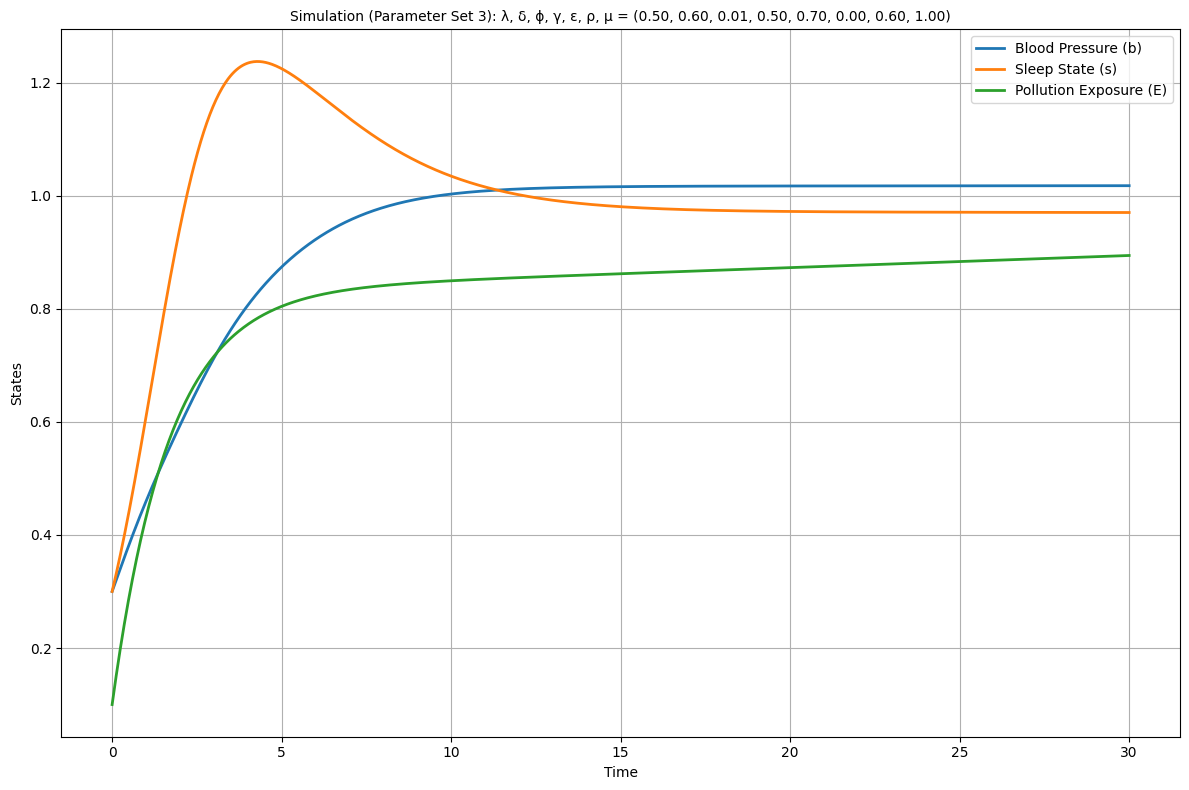

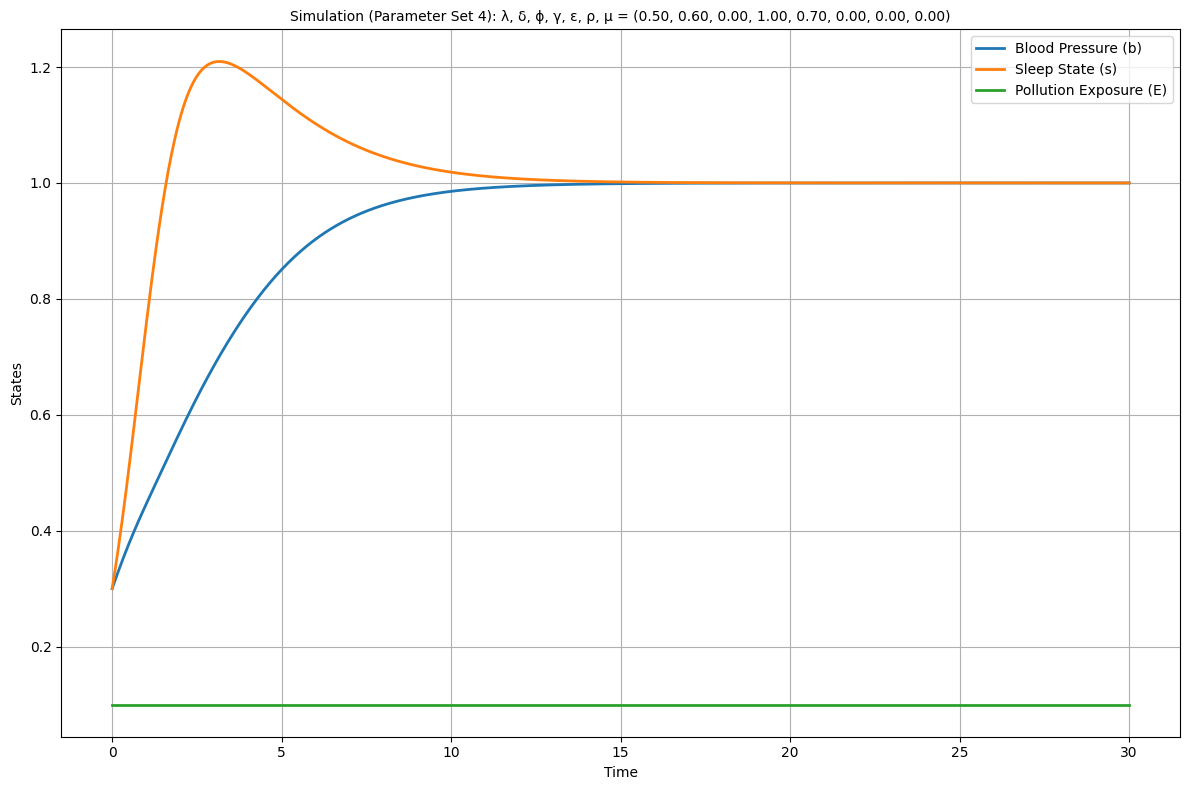

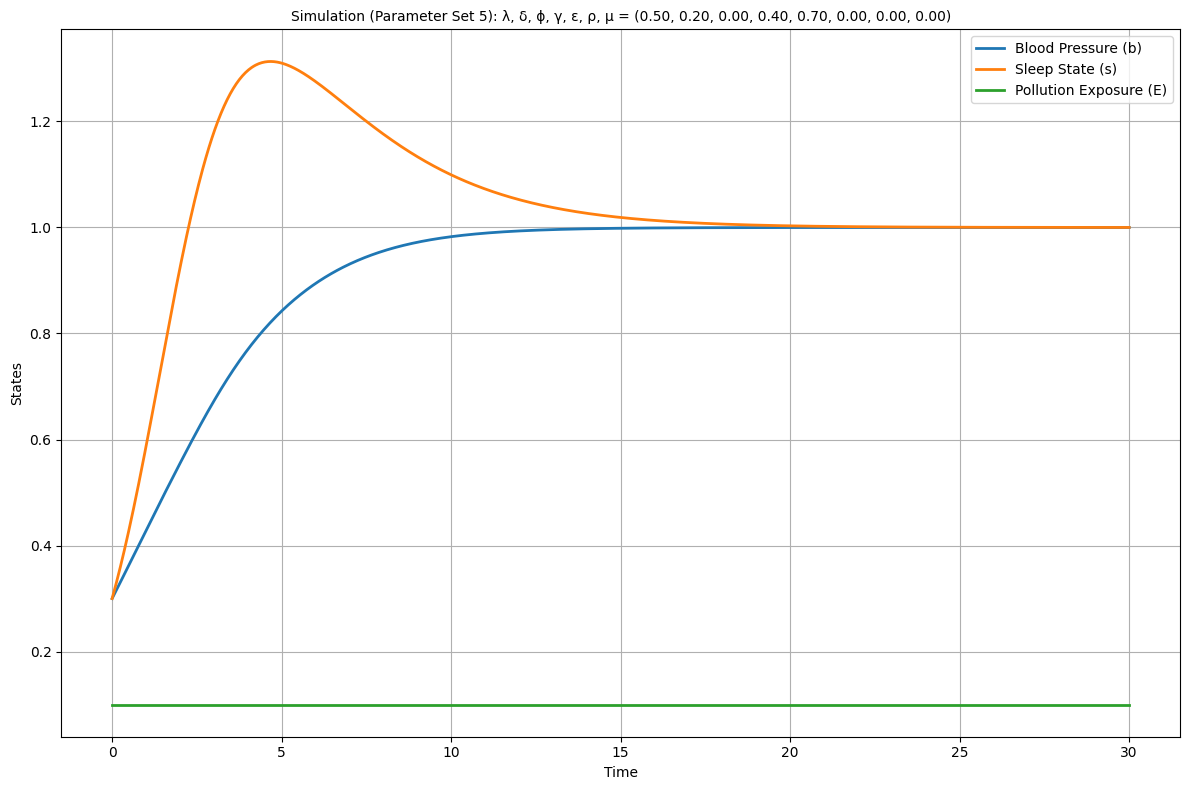

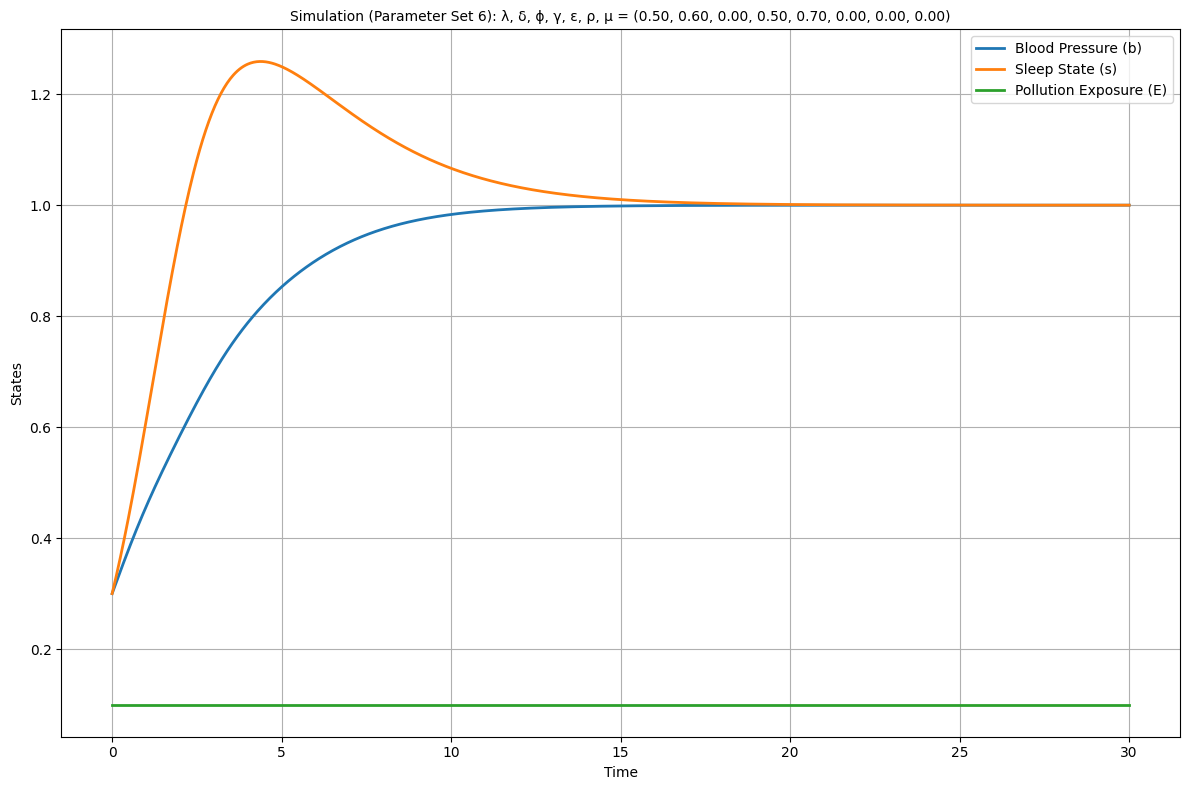

Initial Conditions:
b0:0.05 s0:0.5 E0:0.2


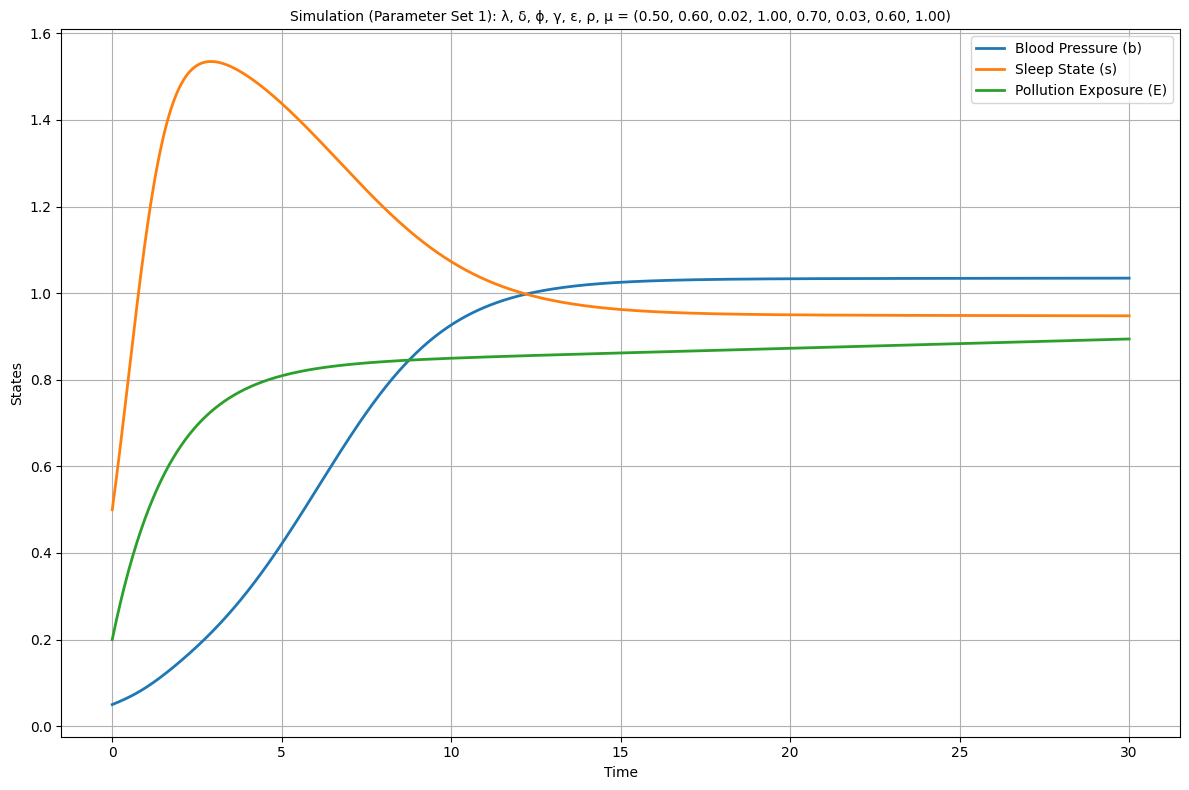

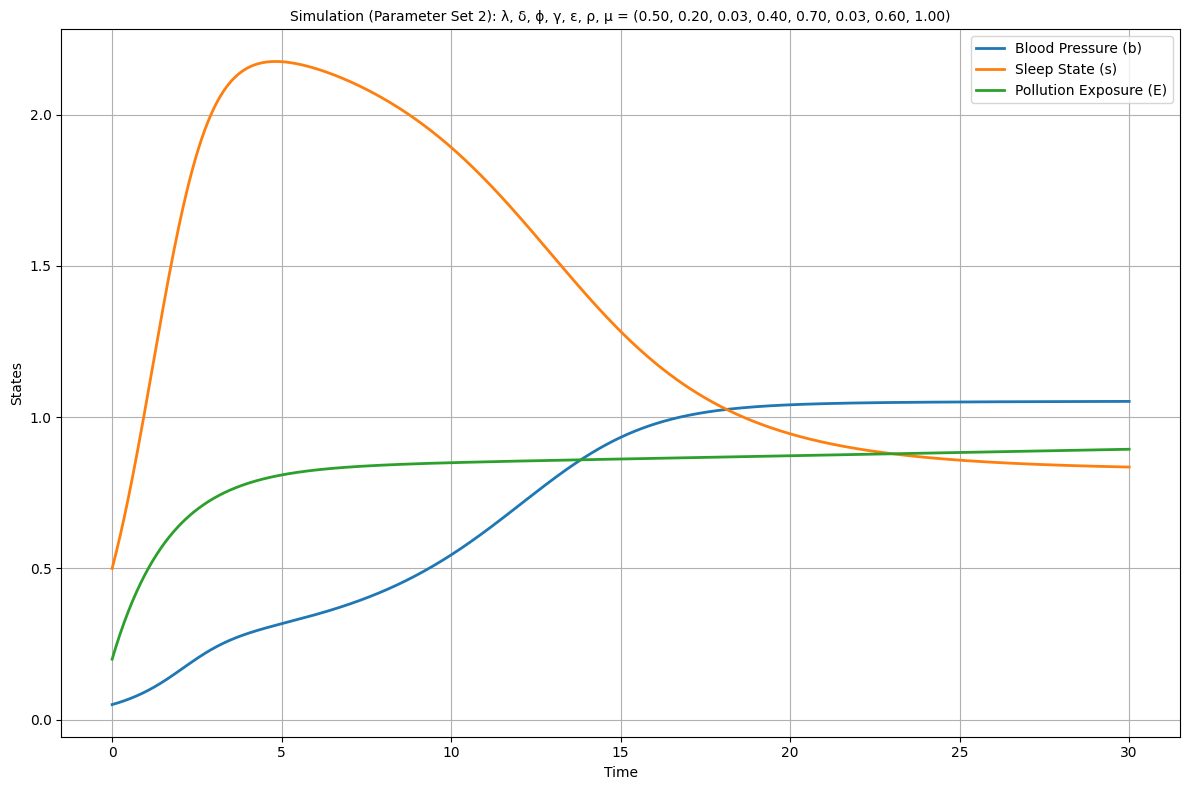

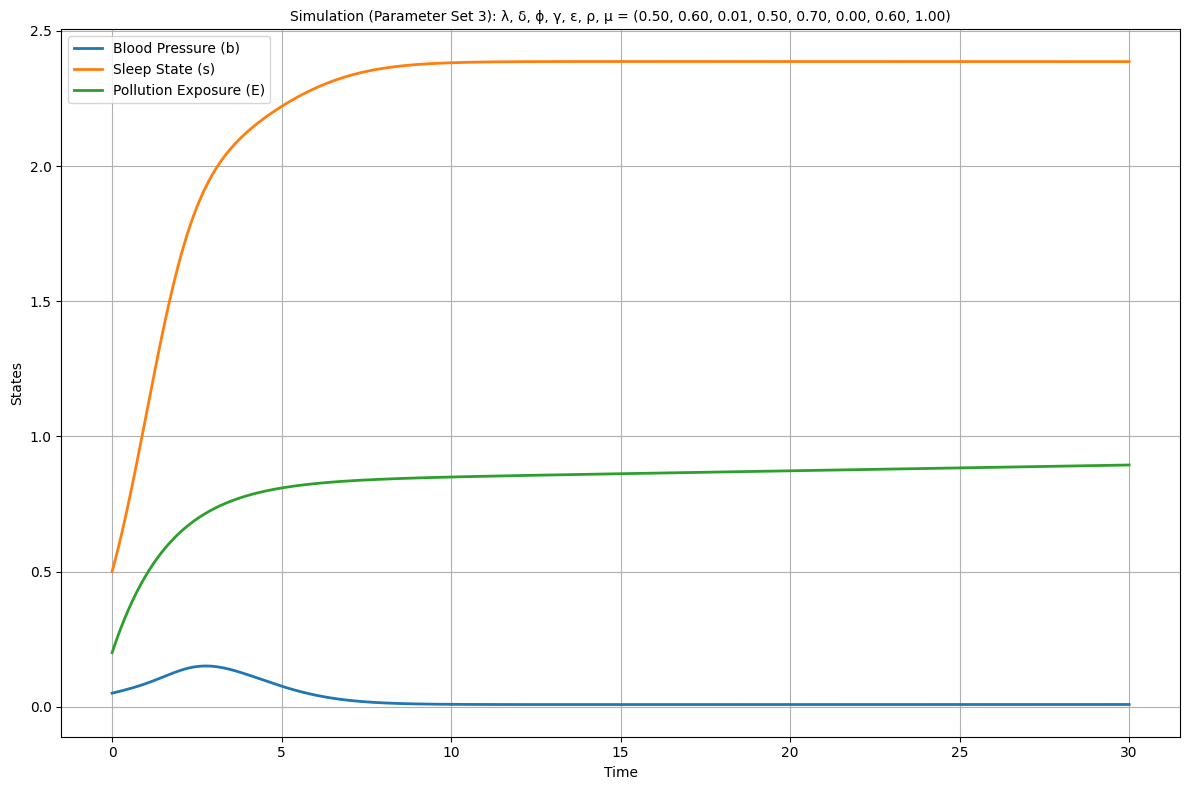

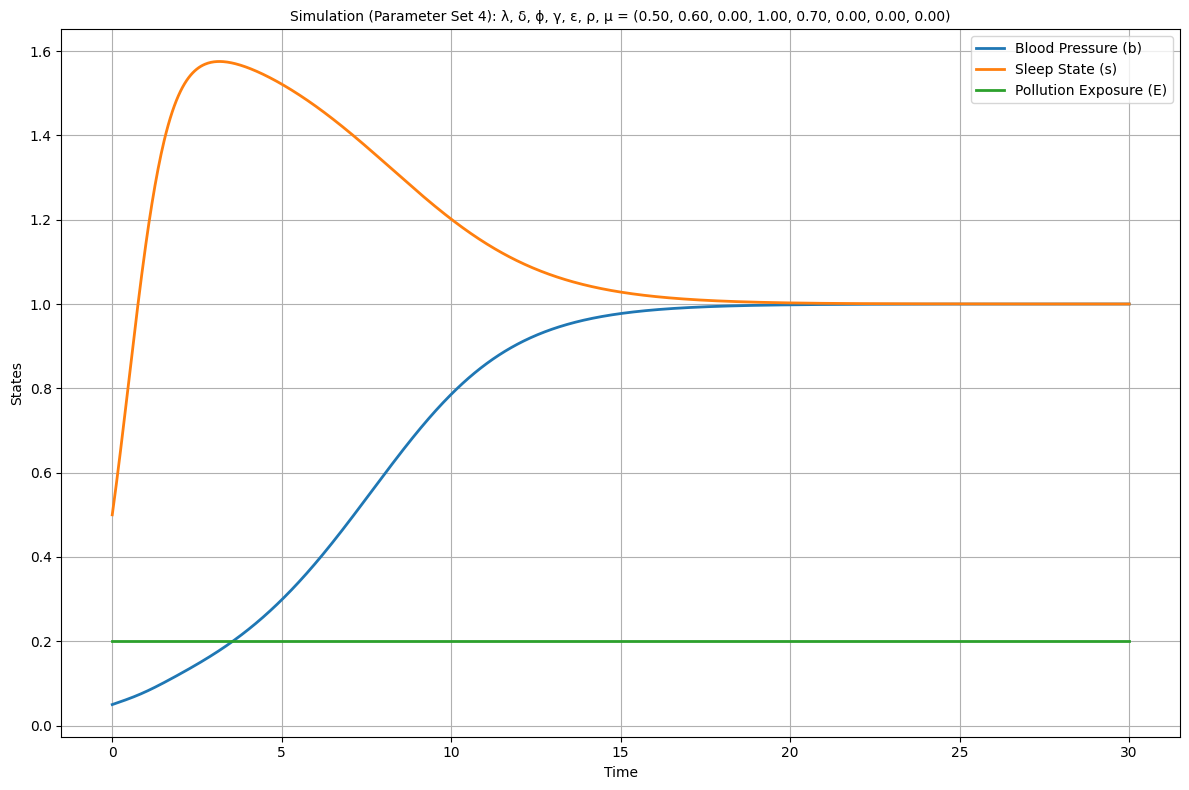

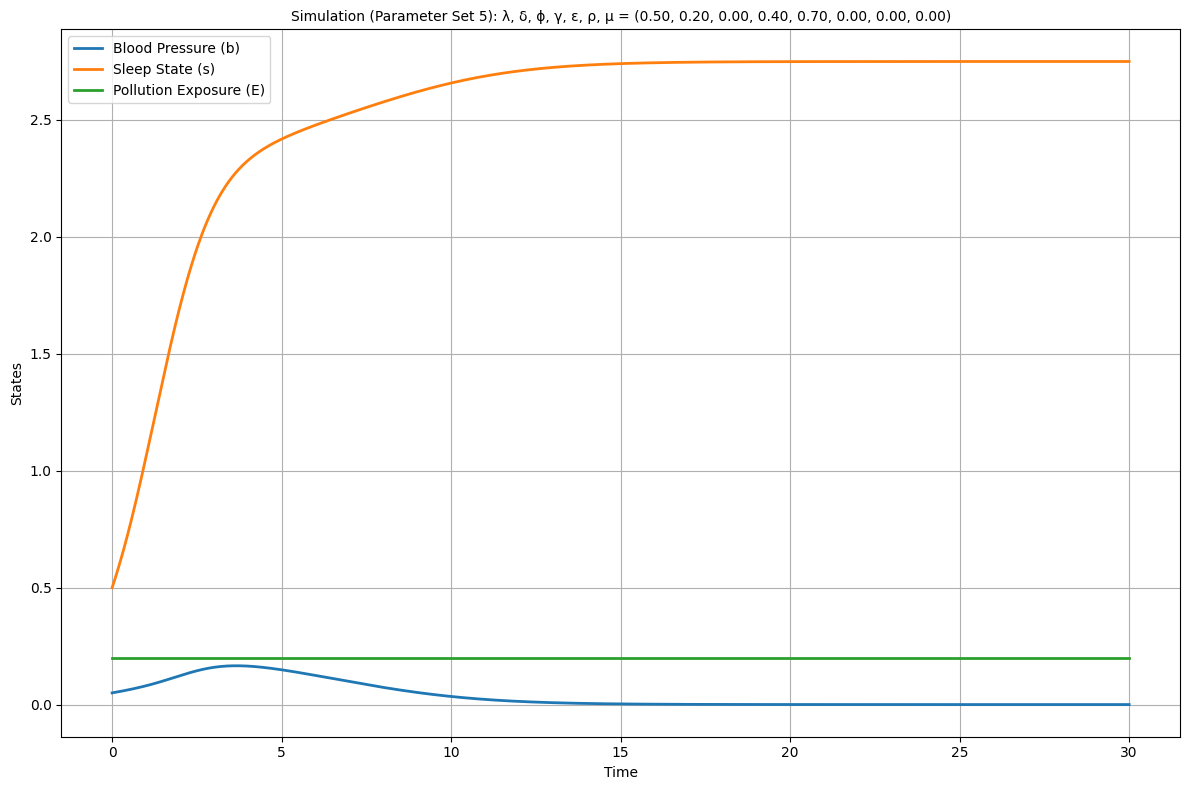

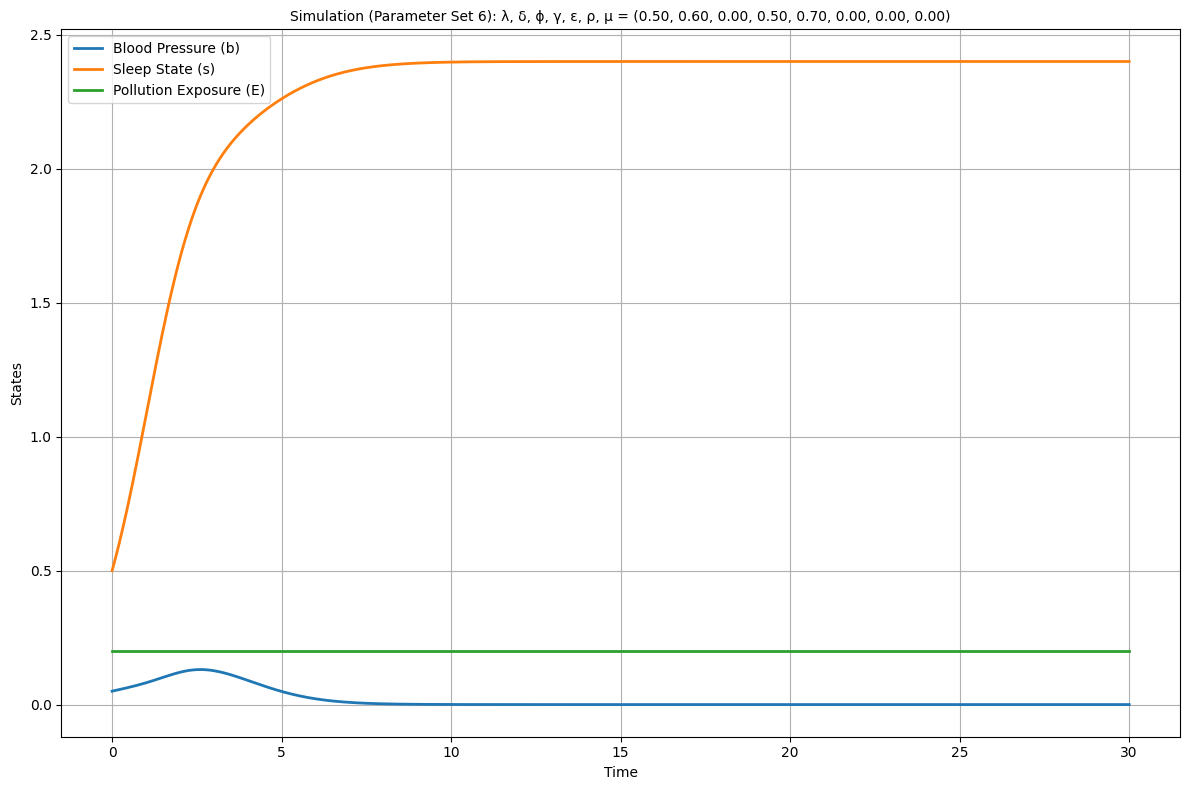

Initial Conditions:
b0:1 s0:1 E0:1


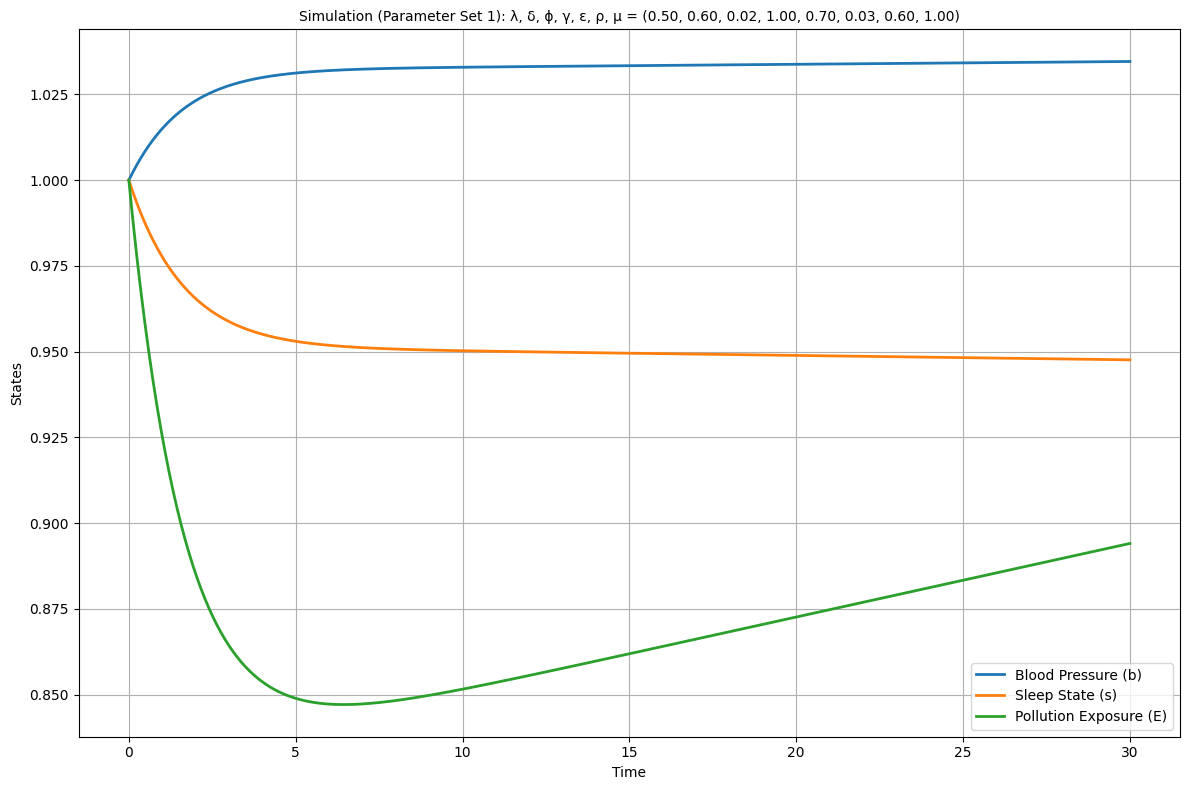

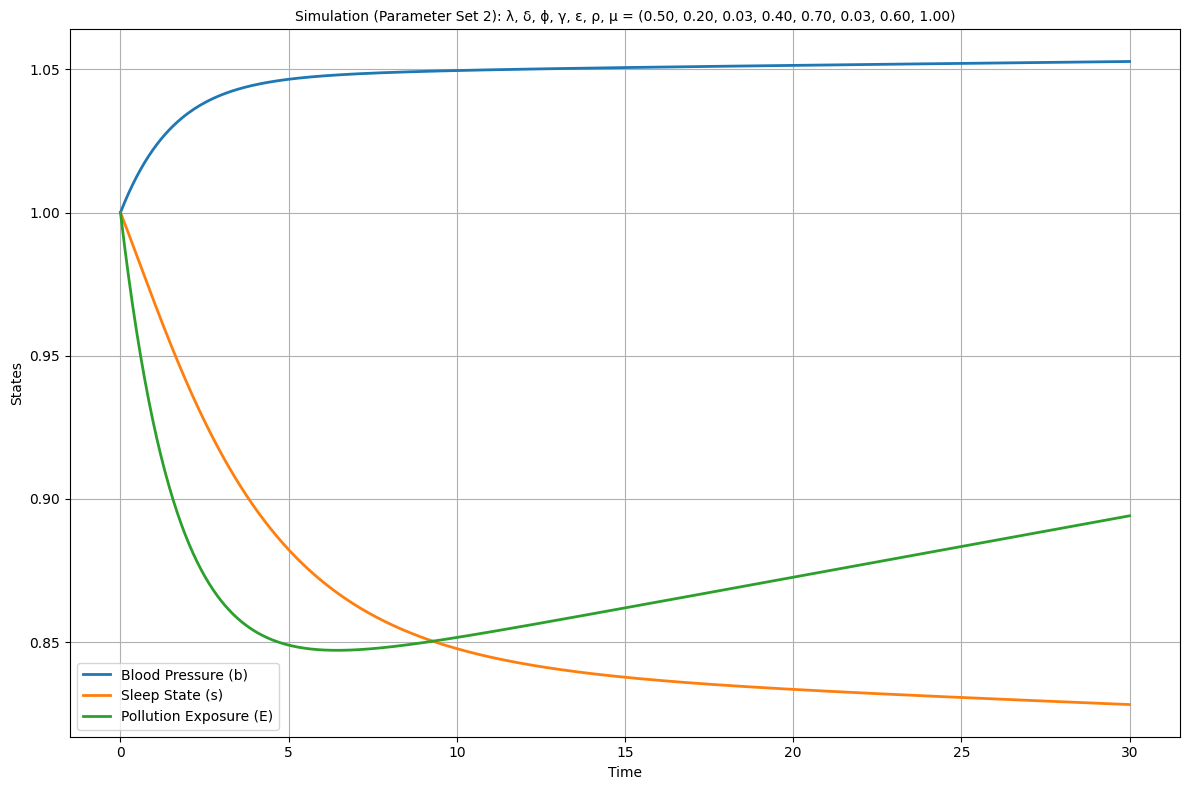

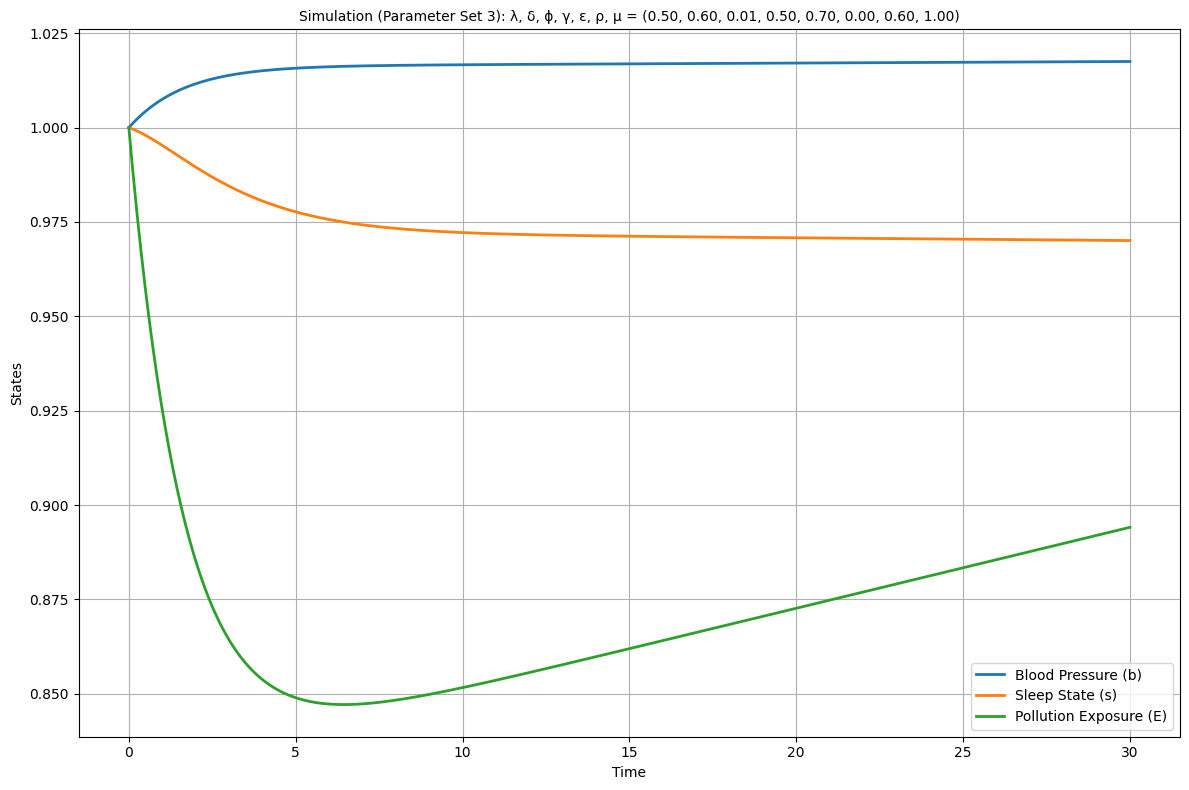

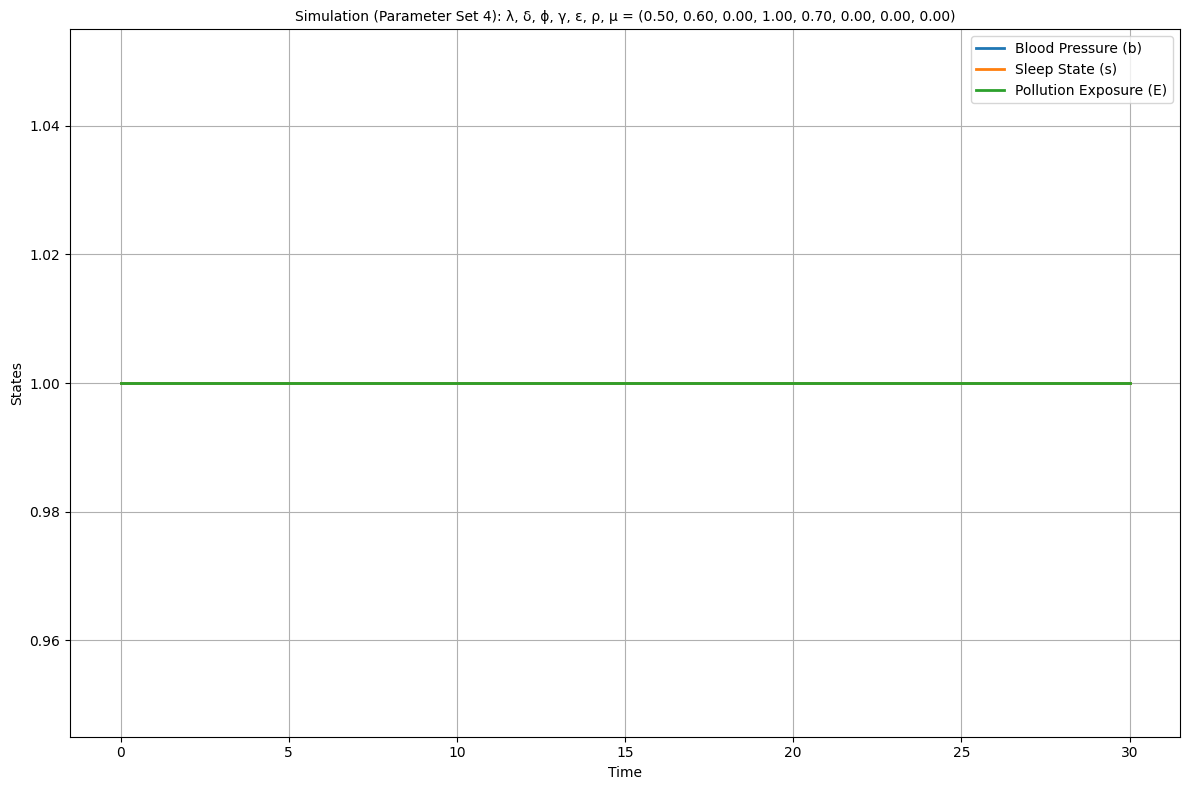

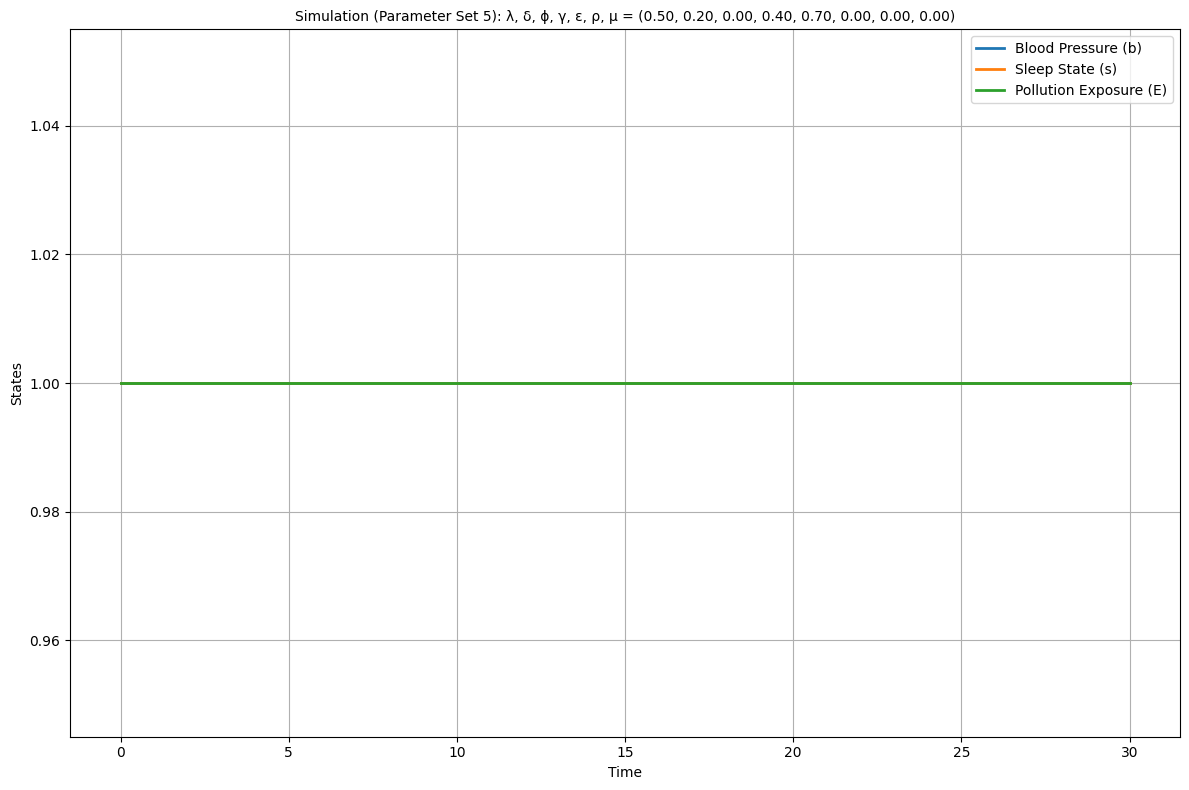

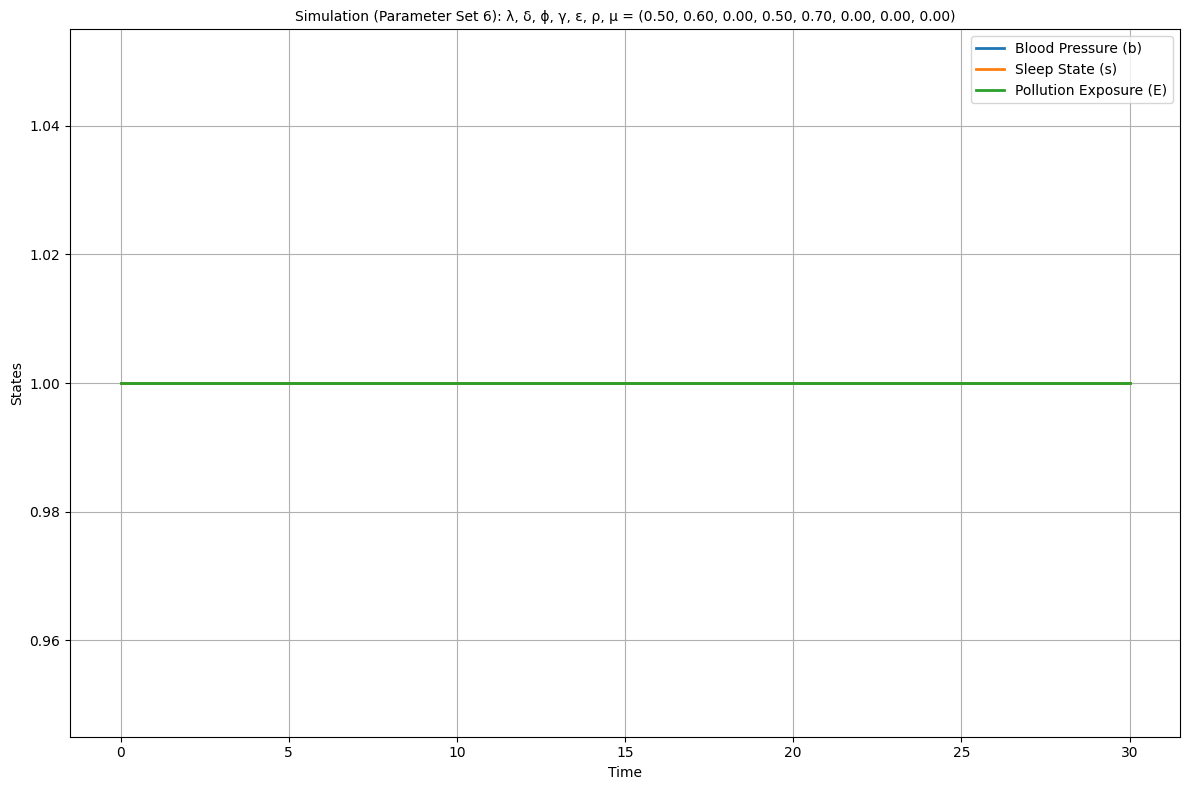

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def system(y, t, params):
    b, s, E = y
    λ, δ, ϕ, γ, ε, ρ, μ, theta  = params

    # Define pollution accumulation function p(t)
    def p(t):
        #periodic pollution exposure
        #return 0.5 + 0.6 * np.sin(.2 * t)
        #Linear Exposure: Tidal volume * breathes per minute * Deposition fraction * Ambient Concentration * time
        return 0.5 + 0.6 *13 * .33 * 0.0005 * t
        #No pollution
        #return 0

    db_dt = λ * b * (1 - b) + δ * b * (1 - s)**3 + ϕ * E
    ds_dt = γ * s * (1 - s) + ε * s * (1 - b) - ρ * E
    dE_dt = theta * p(t) - μ * E

    return [db_dt, ds_dt, dE_dt]

# Initial conditions
b0 = .3
s0 = .3
E0 = 0
y0 = [b0, s0, E0]
# Initial conidition sets
y0_sets =[[0,0,0],[.3,.3,0],[.3,.3,.1],[.05,.5,.2], [1,1,1], ]

# Parameter sets to test
param_sets = [
    [0.5, 0.6, 0.02, 1, 0.7, 0.03, .6, 1],  # Parameters that induced 4 steady states w/pollution
    [0.5, 0.2, 0.03, 0.4, 0.7, 0.03, 0.6,1],   # parameters that induced 5 steady states w/ pollution
    [0.5, 0.6, 0.01, 0.5, 0.7, 0.003, 0.6,1],    # parameters that induced 6 steady states w/ pollution
    [0.5, 0.6, 0.0, 1, 0.7, 0.0, 0.0, 0],
    [0.5, 0.2, 0.0, 0.4, 0.7, 0.0, 0.0, 0],   # parameters that induced 5 steady states w/0 pollution
    [0.5, 0.6, 0.0, 0.5, 0.7, 0.0, 0.0, 0]
]

# Time span
t = np.linspace(0, 30, 1000)
#iterate through initial conditions
for y0 in y0_sets:
  b0, s0, E0 = y0
  print("Initial Conditions:")
  print("b0:" + str(b0) + " s0:" + str(s0) + " E0:" + str(E0))
  # Iterate through parameter sets
  for i, params in enumerate(param_sets):
      # Solve the ODE system
      solution = odeint(system, y0, t, args=(params,))
      b, s, E = solution.T

      # Plot results for each parameter set
      plt.figure(figsize=(12, 8))
      plt.plot(t, b, label='Blood Pressure (b)', lw=2)
      plt.plot(t, s, label='Sleep State (s)', lw=2)
      plt.plot(t, E, label='Pollution Exposure (E)', lw=2)

      # Display parameters above the graph
      param_str = ", ".join([f"{p:.2f}" for p in params])
      plt.title(f'Simulation (Parameter Set {i+1}): λ, δ, ϕ, γ, ε, ρ, μ = ({param_str})', fontsize=10)


      plt.xlabel('Time')
      plt.ylabel('States')

      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()


Initial Conditions Set 1: b0=0, s0=0, E0=0


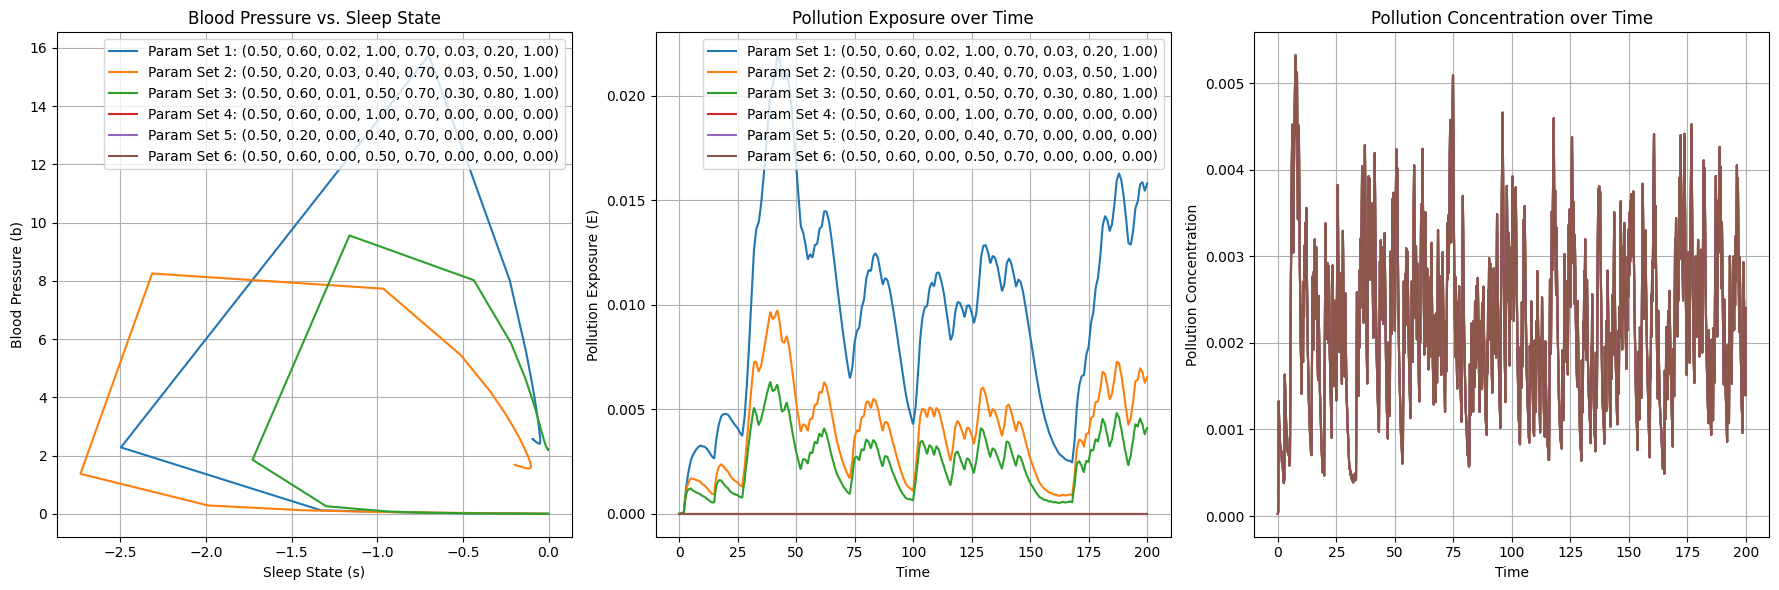

Initial Conditions Set 2: b0=0.8, s0=0.2, E0=0.02


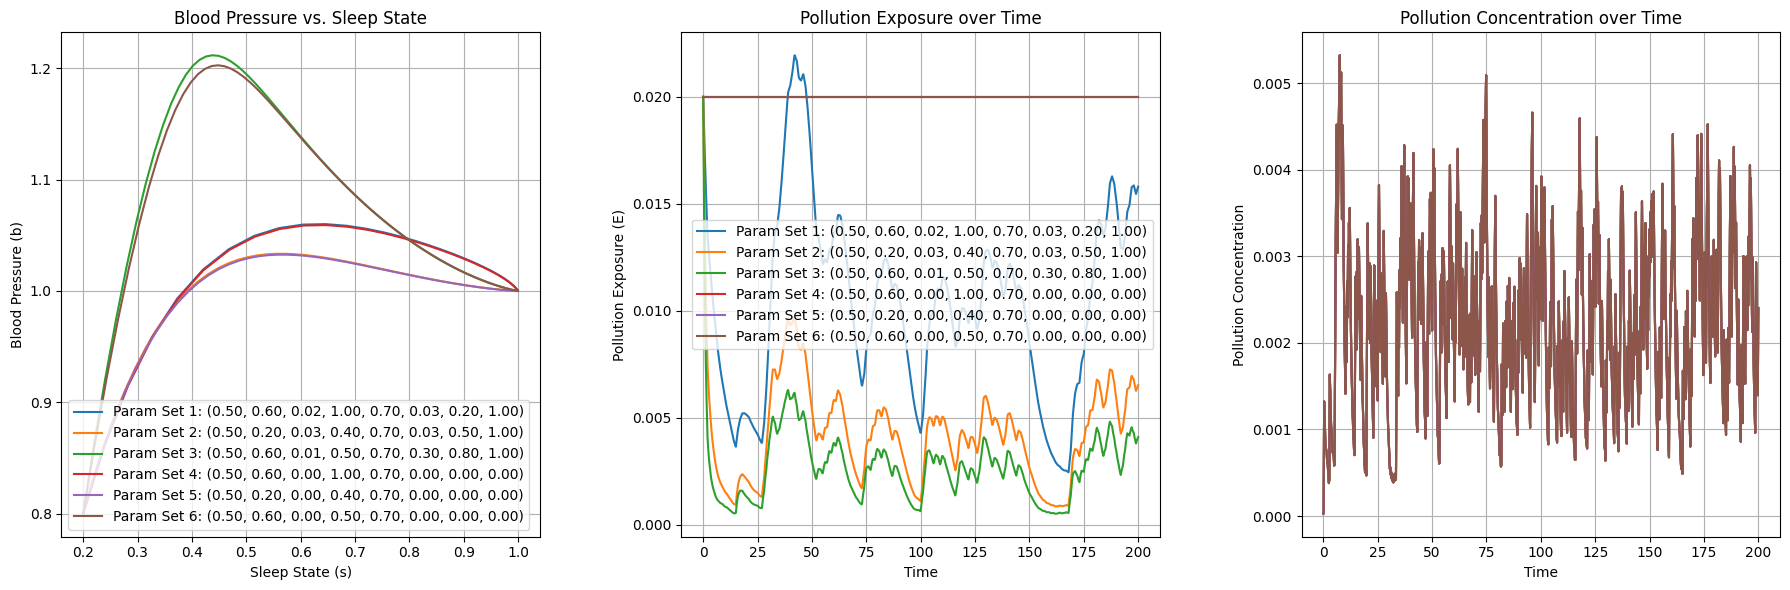

Initial Conditions Set 3: b0=0.03, s0=1, E0=0.5


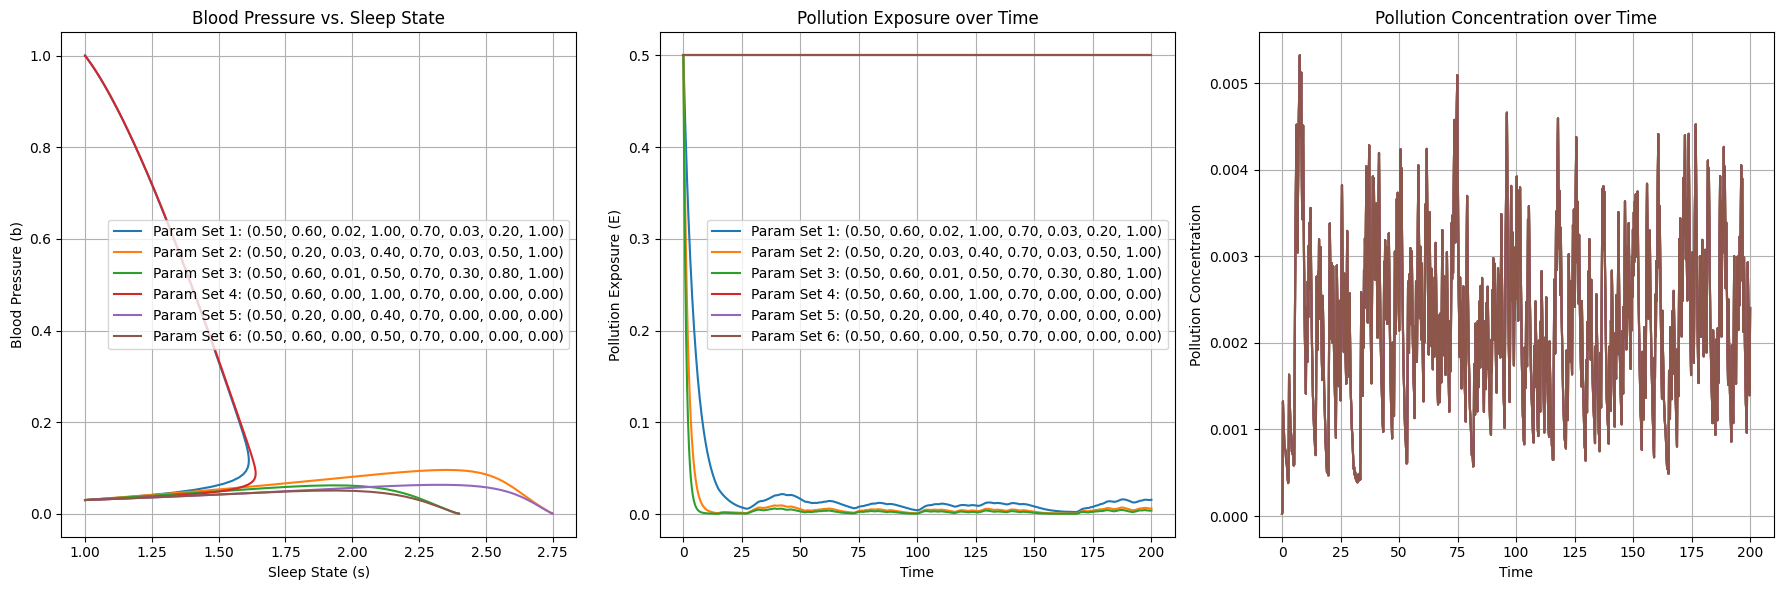

Initial Conditions Set 4: b0=0.3, s0=0.3, E0=0


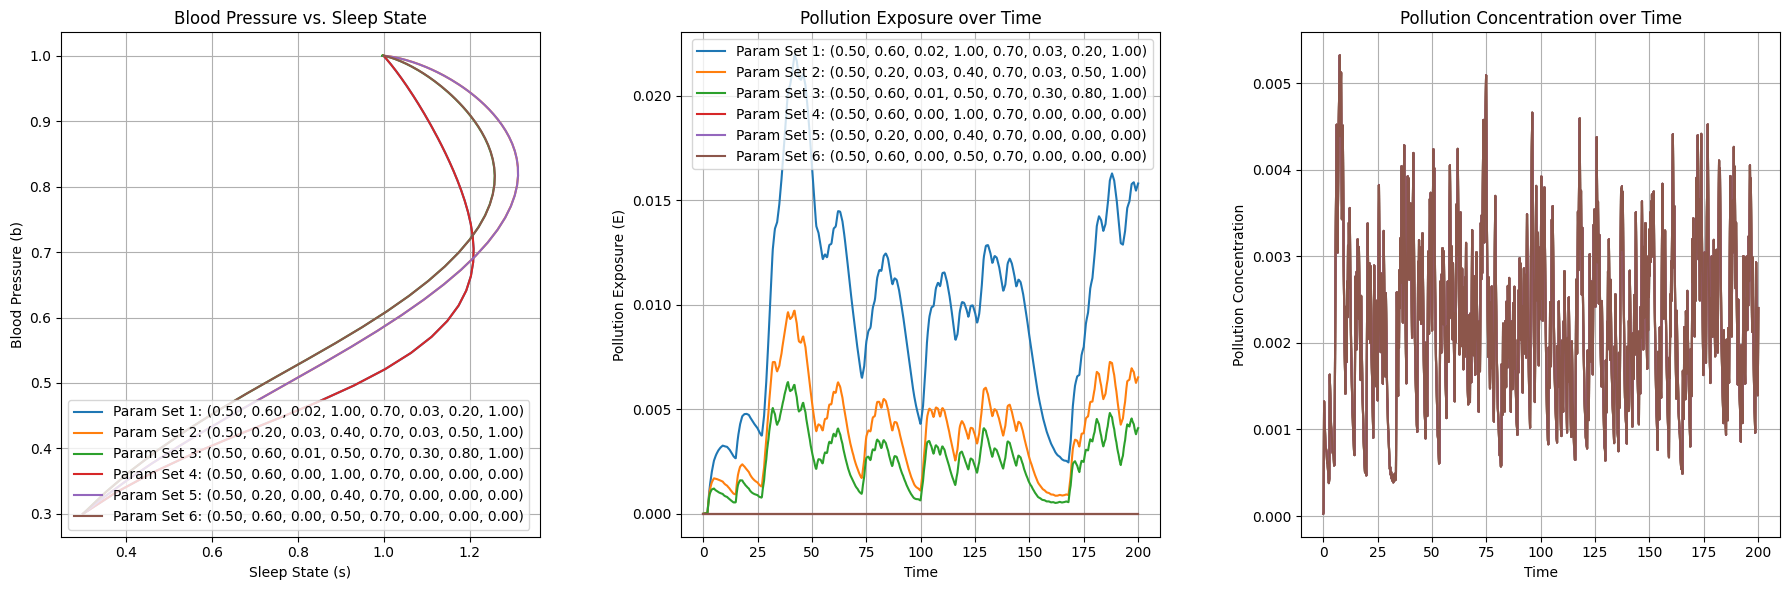

Initial Conditions Set 5: b0=1.1, s0=0.2, E0=0.1


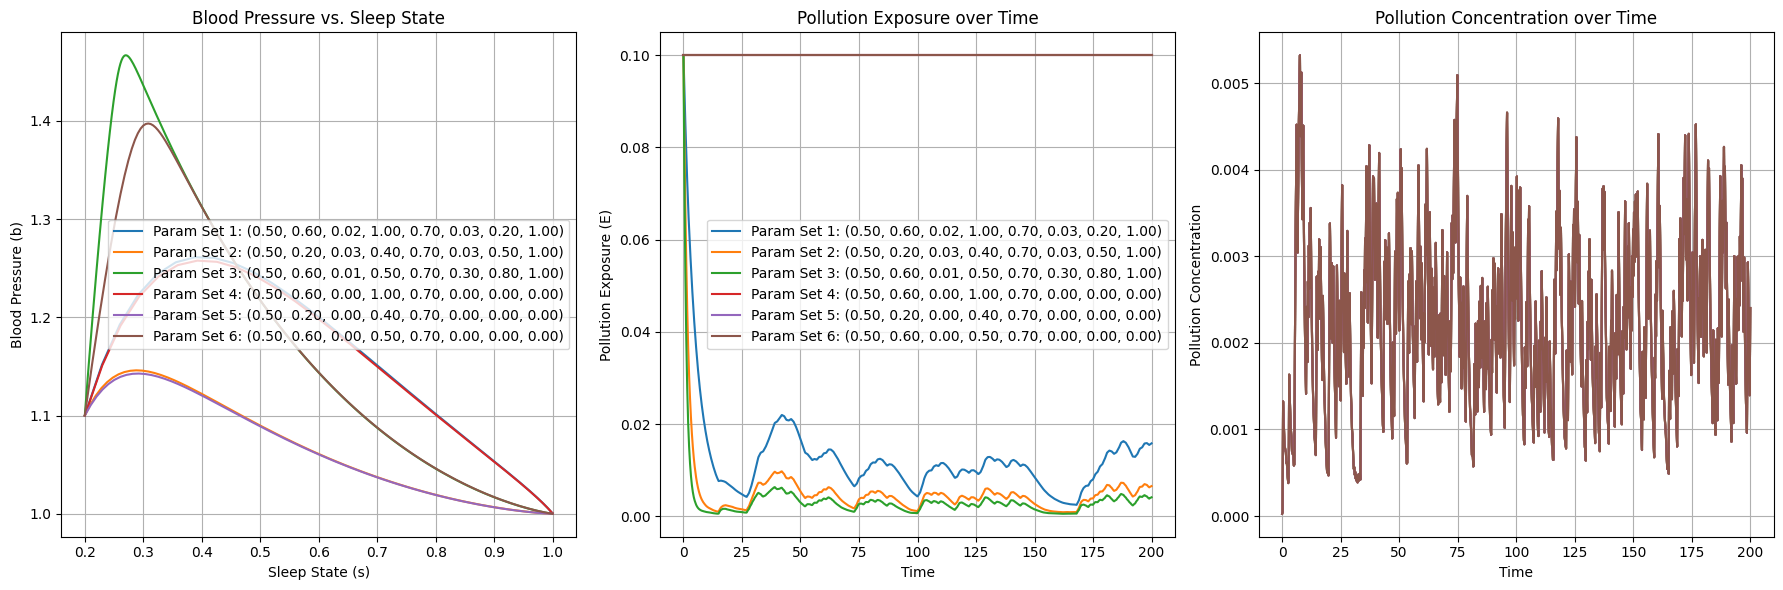

Initial Conditions Set 6: b0=0.5, s0=0.5, E0=0.2


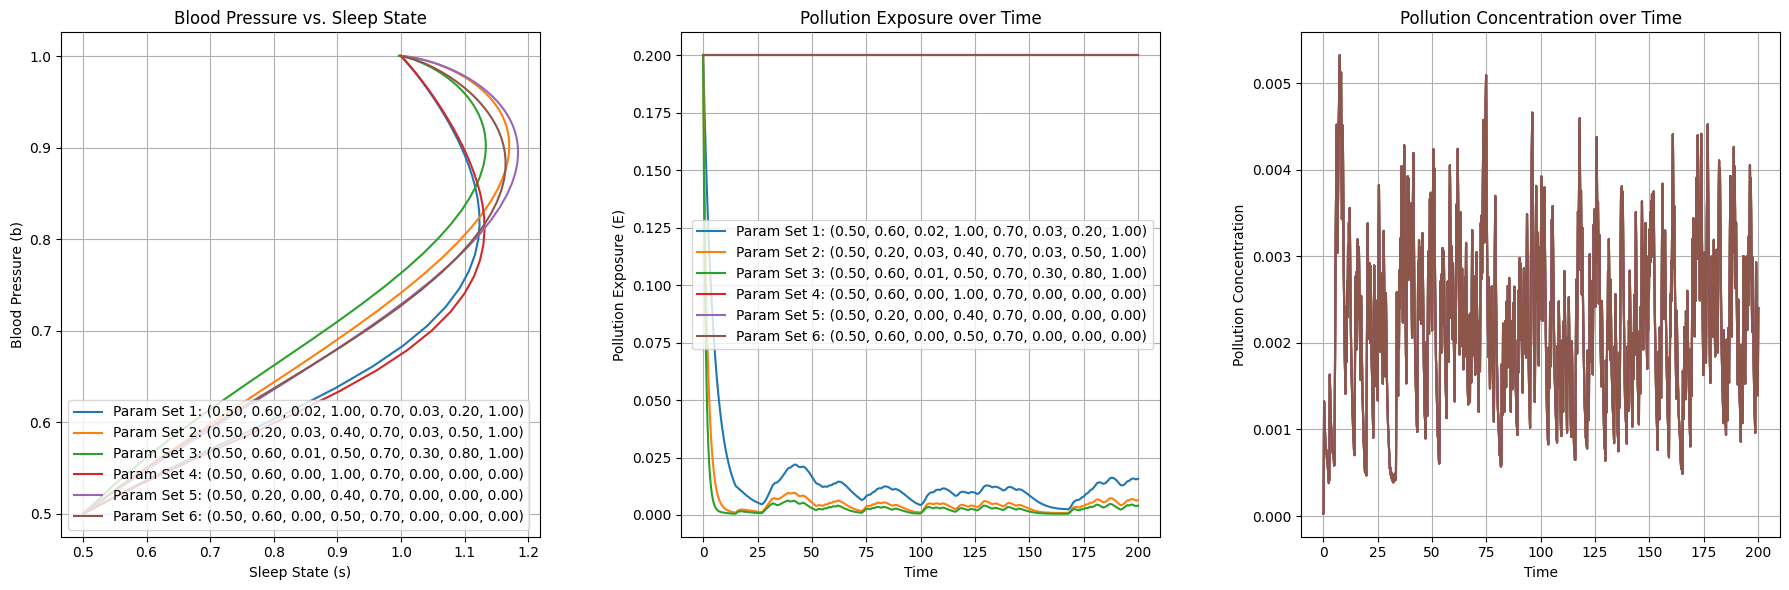

Initial Conditions Set 7: b0=1, s0=1, E0=1


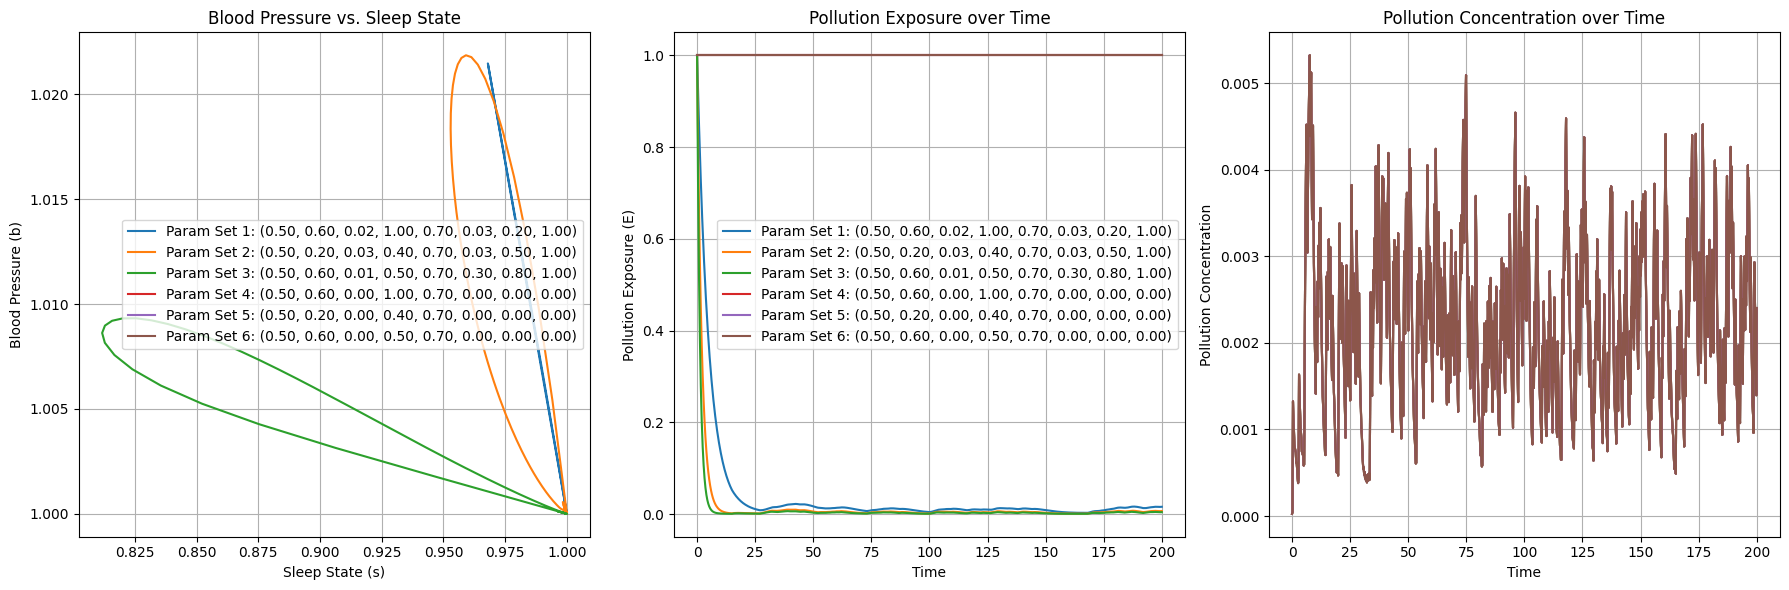

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from google.colab import files
import random

# Define the ODE system
def system(y, t, params, pollution_history):
    b, s, E = y
    λ, δ, ϕ, γ, ε, ρ, μ, theta  = params

    # Access pollution history at the current time step
    p_t = pollution_history[int(t)] if int(t) < len(pollution_history) else pollution_history[-1]

    db_dt = λ * b * (1 - b) + δ * b * (1 - s)**3 + ϕ * E
    ds_dt = γ * s * (1 - s) + ε * s * (1 - b) - ρ * E
    dE_dt = theta * p_t - μ * E

    return [db_dt, ds_dt, dE_dt]

# Initial conditions
# Initial conidition sets
y0_sets =[[0,0,0],[.8,.2,.02],[.03,1,.5],[.3,.3,0],[1.1,.2,.1],[.5,.5,.2], [1,1,1], ]

# Parameter sets to test
param_sets = [
    [0.5, 0.6, 0.02, 1, 0.7, 0.03, .2, 1],  # Parameters that induced 4 steady states w/pollution
    [0.5, 0.2, 0.03, 0.4, 0.7, 0.03, .5,1],   # parameters that induced 5 steady states w/ pollution
    [0.5, 0.6, 0.01, 0.5, 0.7, 0.3, 0.8,1],    # parameters that induced 6 steady states w/ pollution
    [0.5, 0.6, 0.0, 1, 0.7, 0.0, 0.0, 0],
    [0.5, 0.2, 0.0, 0.4, 0.7, 0.0, 0.0, 0],   # parameters that induced 5 steady states w/0 pollution
    [0.5, 0.6, 0.0, 0.5, 0.7, 0.0, 0.0, 0]
]

# Time span
t = np.linspace(0, 200, 1000)

# Number of neighborhoods (pollution sources)
num_neighborhoods = 3

# Generate random pollution concentrations for each neighborhood over time
#array of the avg ambient pollution for each type of neighborhood
pollution_concentrations = [.00001, .00005, .0005] # Example random concentrations
pollution_history = np.zeros(len(t))
for _t in range(len(t)):
  random_neighborhood = random.randint(0,num_neighborhoods-1)
  if _t == 0:
    pollution_history[_t] = 0.6 *13 * .33 * pollution_concentrations[random_neighborhood]
  else:
    pollution_history[_t] = (pollution_history[_t - 1] * .8 + 0.6 *13 * .33 * pollution_concentrations[random_neighborhood])

#Example pollution accumulation
# pollution_concentrations = np.zeros((num_neighborhoods, len(t)))
# for i in range(num_neighborhoods):
#   for j in range(len(t)):
#     pollution_concentrations[i][j] = .6 * 13 * 0.33 * .000005 * t[j] + np.random.uniform(0, .001)


# Iterate through initial conditions
for i, y0 in enumerate(y0_sets):
    b0, s0, E0 = y0
    print(f"Initial Conditions Set {i+1}: b0={b0}, s0={s0}, E0={E0}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    for j, params in enumerate(param_sets):
      # Iterate through neighborhoods
            # Solve the ODE system with accumulated pollution
            solution = odeint(system, y0, t, args=(params, pollution_history))
            b, s, E = solution.T

            #Plotting
            param_str = ", ".join([f"{p:.2f}" for p in params])
            label = f'Param Set {j+1}: ({param_str})'


            ax1.plot(s, b, label=label)
            ax1.set_xlabel('Sleep State (s)')
            ax1.set_ylabel('Blood Pressure (b)')
            ax1.set_title('Blood Pressure vs. Sleep State')
            ax1.legend()
            ax1.grid(True)

            ax2.plot(t, E, label=label)
            ax2.set_xlabel('Time')
            ax2.set_ylabel('Pollution Exposure (E)')
            ax2.set_title('Pollution Exposure over Time')
            ax2.legend()
            ax2.grid(True)


            ax3.plot(t, pollution_history, label = label)
            ax3.set_xlabel('Time')
            ax3.set_ylabel('Pollution Concentration')
            ax3.set_title('Pollution Concentration over Time')
            ax3.grid(True)


    plt.tight_layout()
    plt.show()


Initial Conditions Set 1: b0=1.5, s0=0.1, E0=0


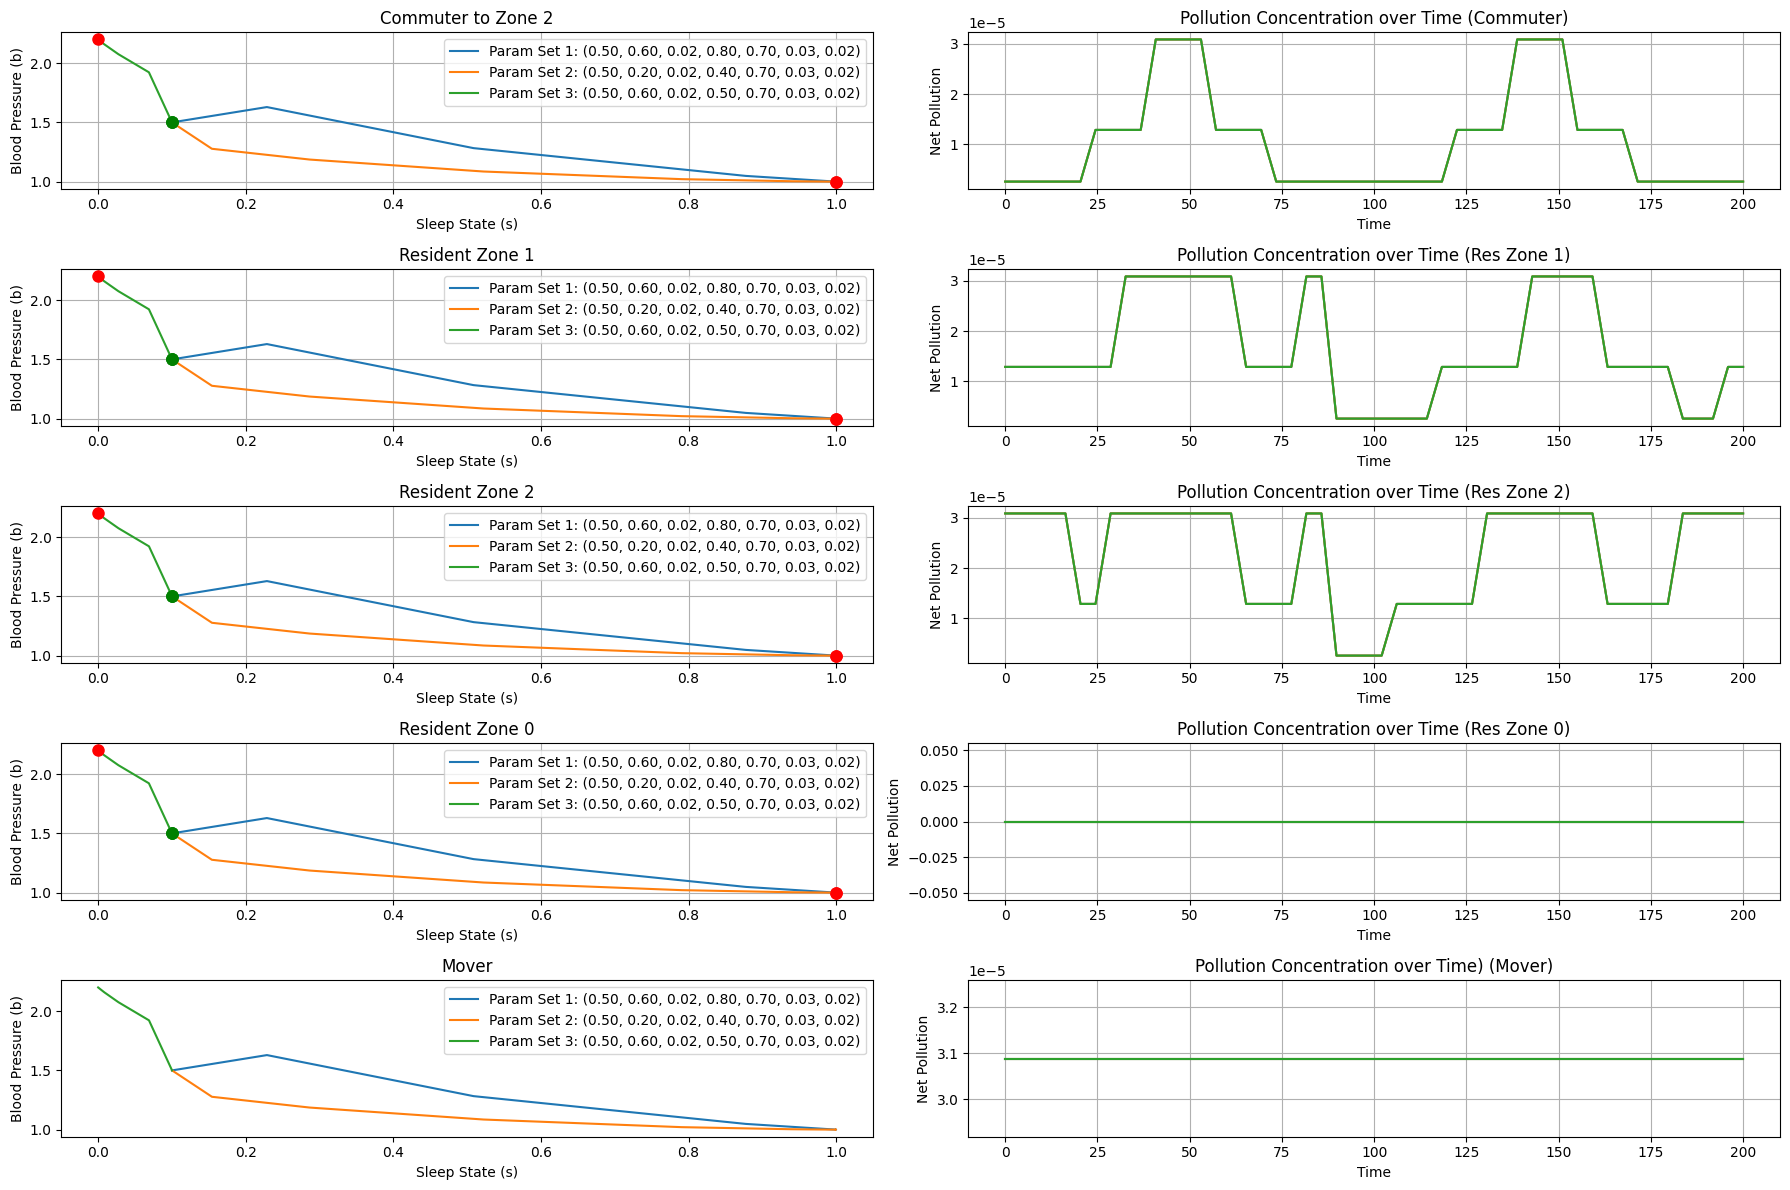

Initial Conditions Set 2: b0=0.8, s0=1.2, E0=0


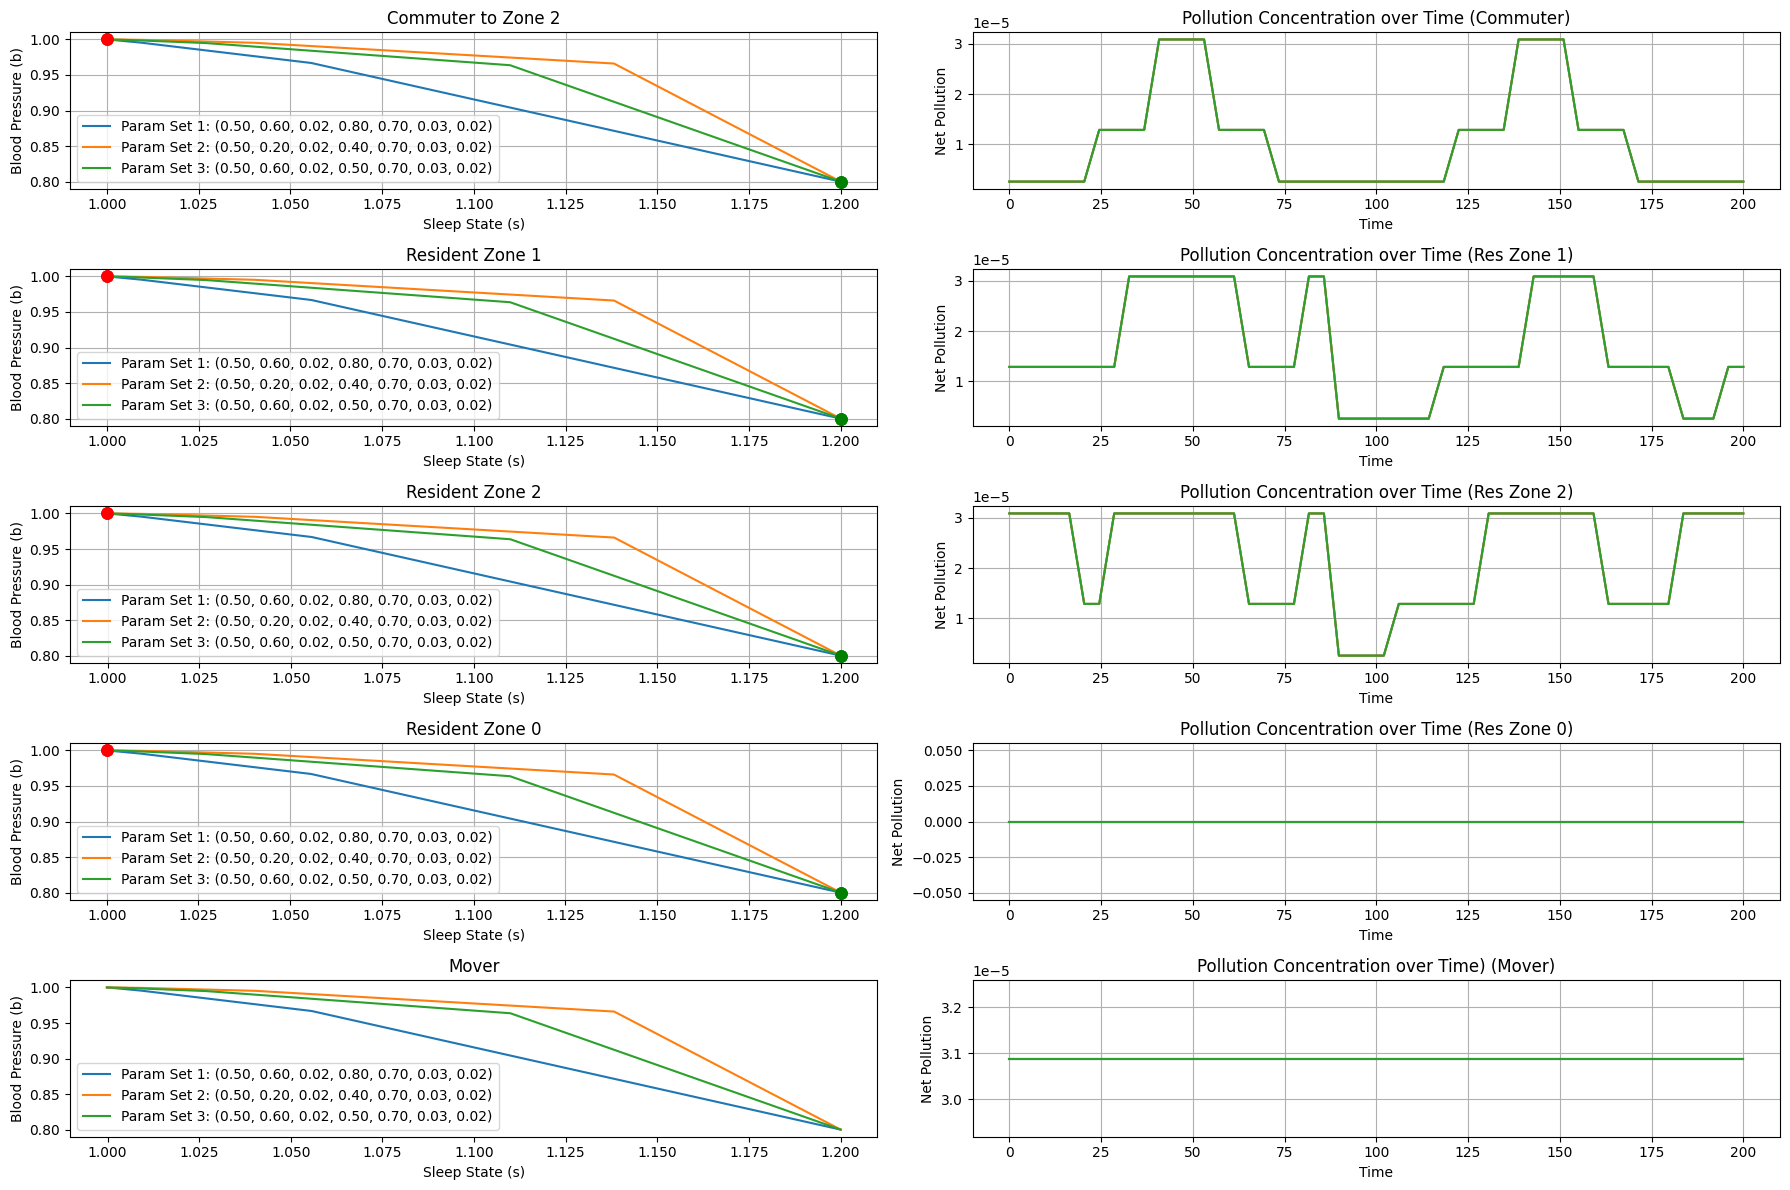

Initial Conditions Set 3: b0=0.3, s0=1.4, E0=0


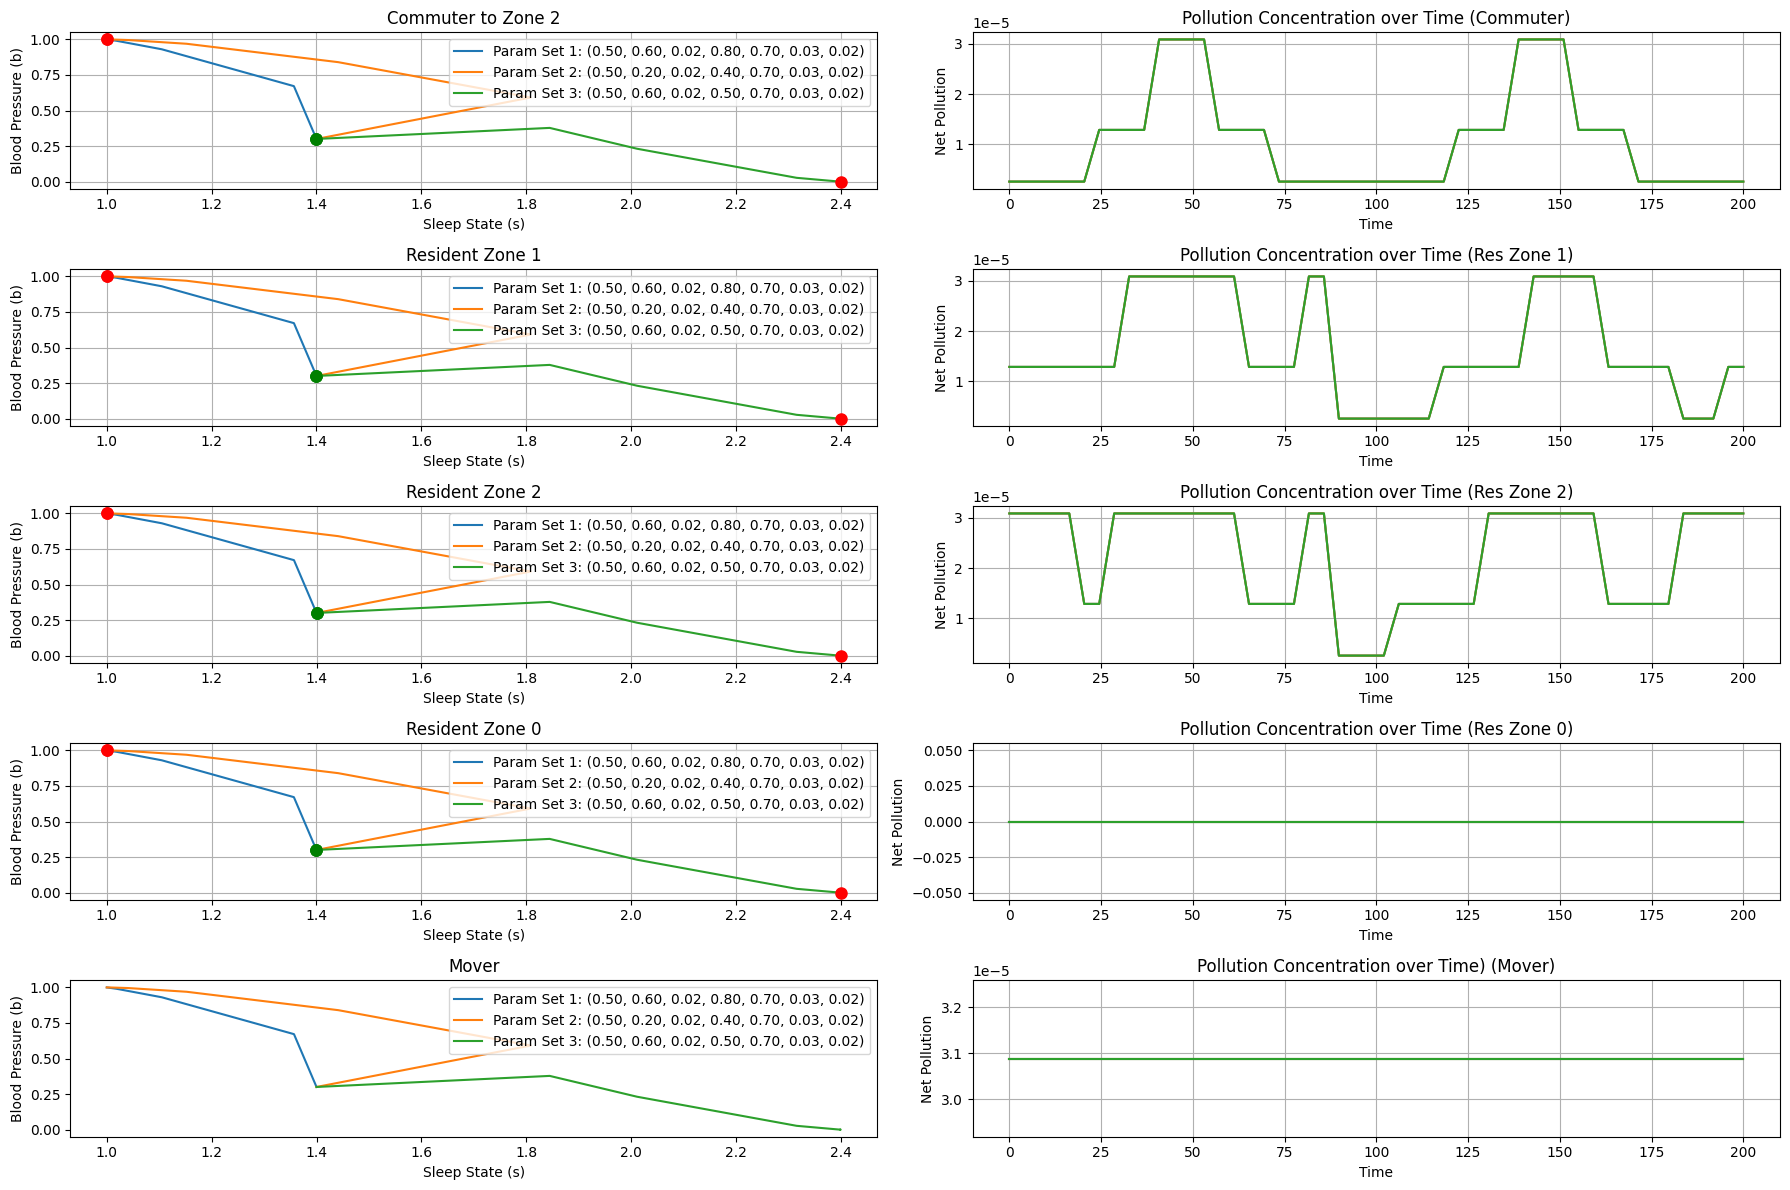

Initial Conditions Set 4: b0=0.5, s0=0.5, E0=0


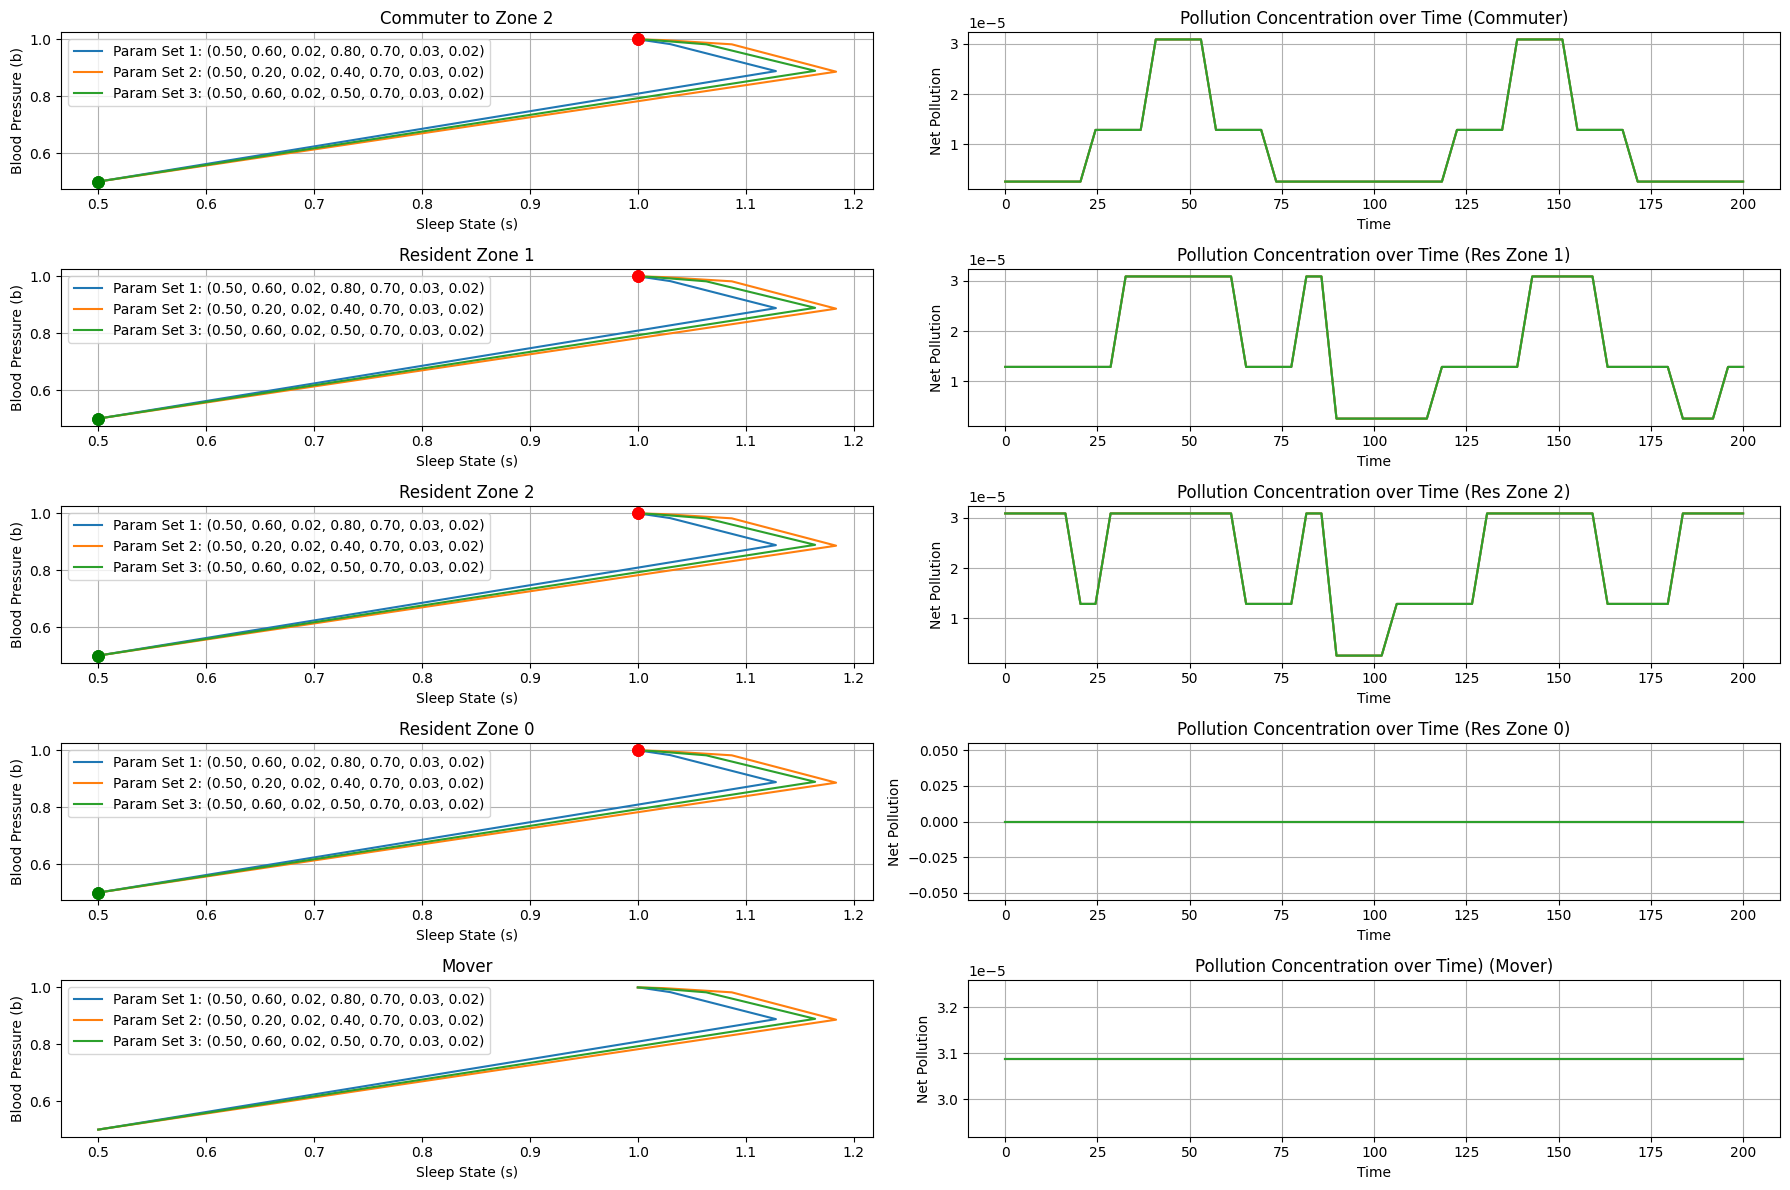

Initial Conditions Set 5: b0=1, s0=1, E0=0


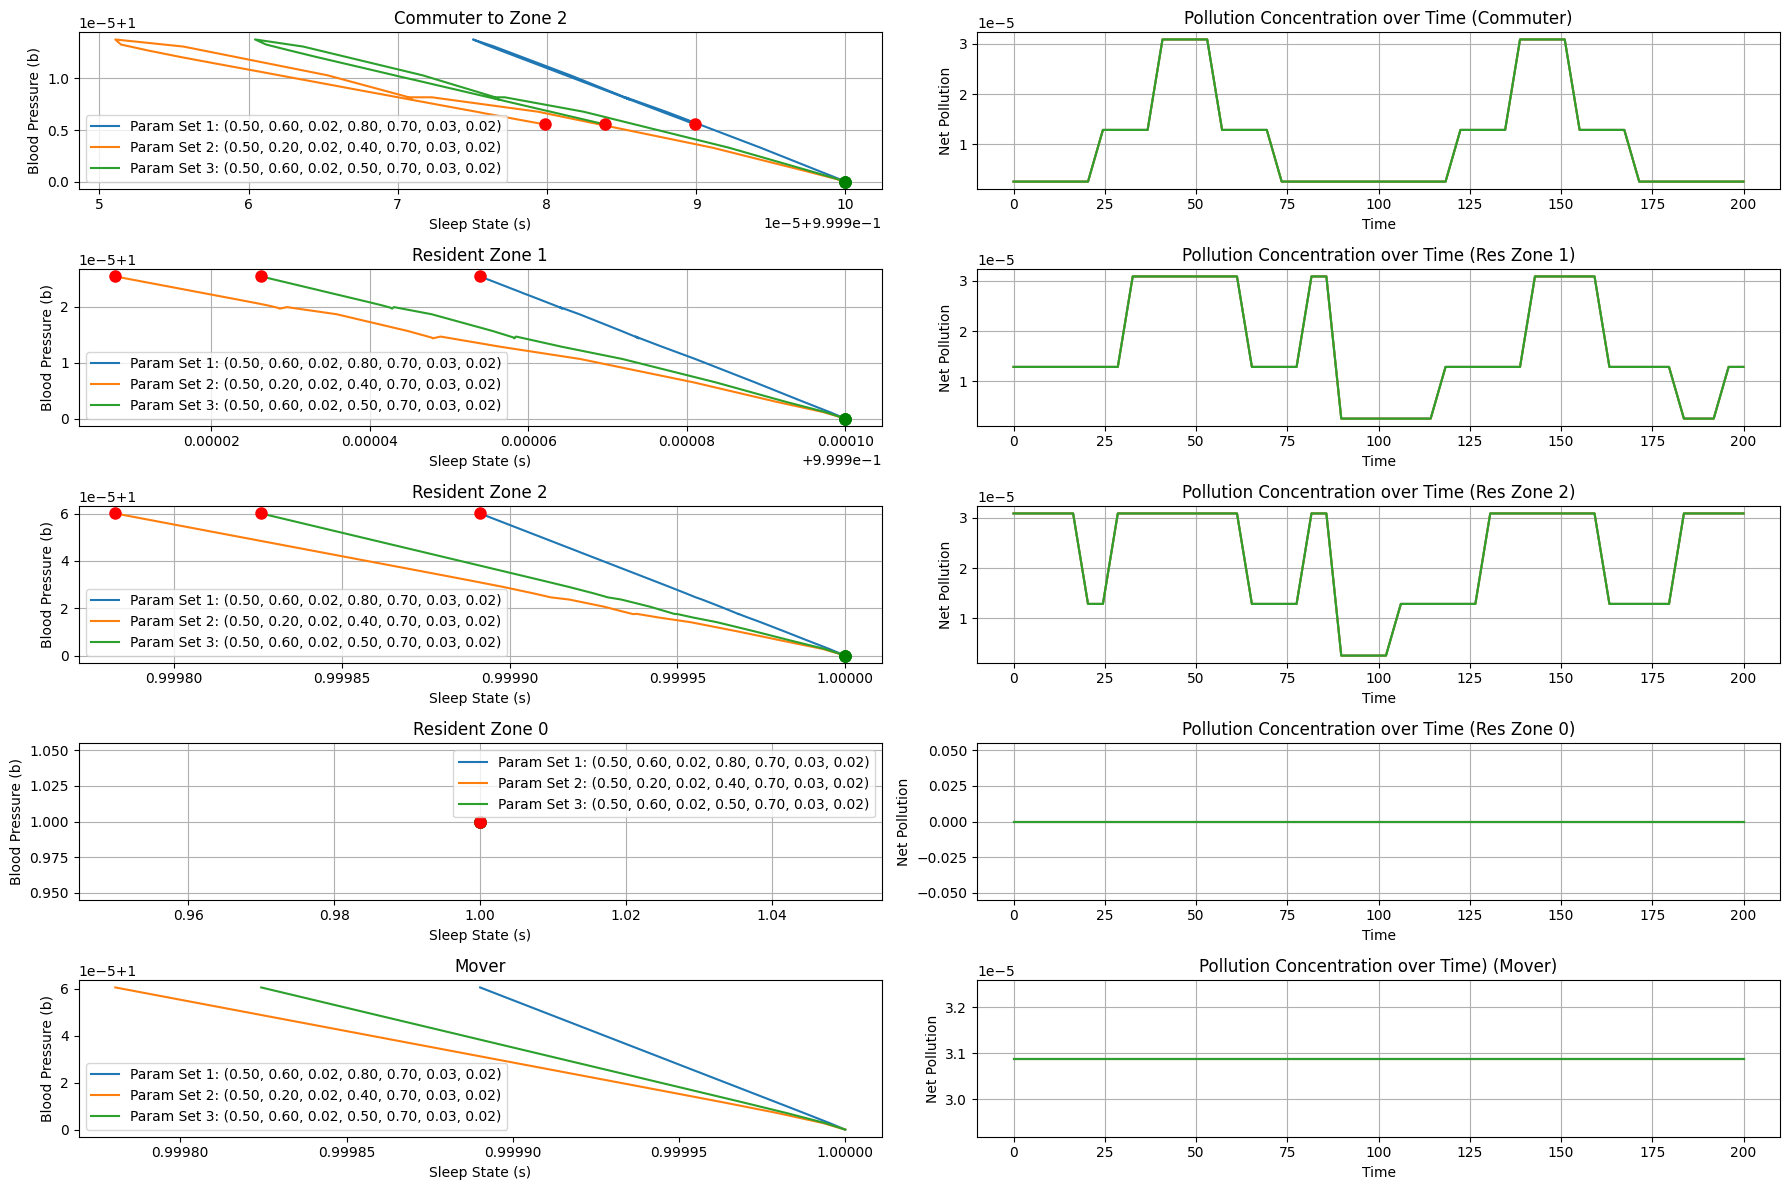

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from google.colab import files
import random

# Define the ODE system
def system(y, t, params, pollution_history):
    b, s, E = y
    λ, δ, ϕ, γ, ε, ρ, μ = params

    # Access pollution history at the current time step
    p_t = pollution_history[int(t)] if int(t) < len(pollution_history) else pollution_history[-1]

    db_dt = λ * b * (1 - b) + δ * b * (1 - s)**3 + ϕ * E
    ds_dt = γ * s * (1 - s) + ε * s * (1 - b) - ρ * E
    dE_dt = p_t - μ * E

    return [db_dt, ds_dt, dE_dt]

# Initial conditions
# Initial conidition sets
y0_sets =[[1.5,.10,0],[.8,1.2,0],[.3,1.4,0],[.5,.5,0], [1,1,0] ]

# Parameter sets to test
param_sets = [
    [0.5, 0.6, 0.02, .8, 0.7, 0.03, .02, ],  # Parameters that induced 4 steady states w/pollution
    [0.5, 0.2, 0.02, 0.4, 0.7, 0.03, .02, ],   # parameters that induced 5 steady states w/ pollution
    [0.5, 0.6, 0.02, 0.5, 0.7, 0.03, 0.02, ],  # parameters that induced 6 steady states w/ pollution
]

param_sets_pol = [[0.5, 0.6, 0.0, 1, 0.7, 0.0, 0.0, 0], #4 w/o pollution
    [0.5, 0.2, 0.0, 0.4, 0.7, 0.0, 0.0, 0],   # parameters that induced 5 steady states w/0 pollution
    [0.5, 0.6, 0.0, 0.5, 0.7, 0.0, 0.0, 0]] #6 w/o pollution
# Time span
t = np.linspace(0, 200, 200)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
#from google.colab import files # Commented out as it's not needed for syntax correction and may not be available in all environments
import random

# Define the ODE system
def system(y, t, params, pollution_history):
    b, s, E = y
    λ, δ, ϕ, γ, ε, ρ, μ = params

    # Access pollution history at the current time step
    p_t = pollution_history[int(t)] if int(t) < len(pollution_history) else pollution_history[-1]

    db_dt = λ * b * (1 - b) + δ * b * (1 - s)**3 + ϕ * E
    ds_dt = γ * s * (1 - s) + ε * s * (1 - b) - ρ * E
    dE_dt = p_t - μ * E

    return [db_dt, ds_dt, dE_dt]

# Initial conditions
# Initial conidition sets
y0_sets =[[1.5,.10,0],[.8,1.2,0],[.3,1.4,0],[.5,.5,0], [1,1,0] ]

# Parameter sets to test
param_sets = [
    [0.5, 0.6, 0.02, .8, 0.7, 0.03, .02],  # Parameters that induced 4 steady states w/pollution
    [0.5, 0.2, 0.02, 0.4, 0.7, 0.03, .02],   # parameters that induced 5 steady states w/ pollution
    [0.5, 0.6, 0.02, 0.5, 0.7, 0.03, 0.02],  # parameters that induced 6 steady states w/ pollution
]

param_sets_pol = [[0.5, 0.6, 0.0, 1, 0.7, 0.0, 0.0, 0], #4 w/o pollution
    [0.5, 0.2, 0.0, 0.4, 0.7, 0.0, 0.0, 0],   # parameters that induced 5 steady states w/0 pollution
    [0.5, 0.6, 0.0, 0.5, 0.7, 0.0, 0.0, 0]] #6 w/o pollution
# Time span
t = np.linspace(0, 200)
mover = np.zeros(len(t))

for i in range(len(t)):
  if i <= 100:
       mover[i] = 2
  elif i > 100 & i <= 150:
       mover[i] = 0
  else:
       mover[i] = 1

commuter = np.array([0,0,0,0,0,0,1,1,1,1,2,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,1,1,1,1,0,0,0,0,0,0])
resident_zone_1 = np.array([1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,0,0,0])
resident_zone_2 = np.array([2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2])
pattern_length = len(commuter)

# Calculate the number of repetitions needed to reach a length of 200
num_repetitions = len(t) // pattern_length

# Create the expanded array by repeating the pattern
expanded_commuter = np.tile(commuter, num_repetitions)
expanded_resident_zone_1 = np.tile(resident_zone_1, num_repetitions)
expanded_resident_zone_2 = np.tile(resident_zone_2, num_repetitions)

# Append the remaining elements from the pattern if necessary
remaining_elements = len(t) % pattern_length
remaining_commuter = commuter[:remaining_elements]
remaining_resident_zone_1 = resident_zone_1[:remaining_elements]
remaining_resident_zone_2 = resident_zone_2[:remaining_elements]
if remaining_elements > 0:
    expanded_commuter = np.concatenate((expanded_commuter, commuter[:remaining_elements]))
    expanded_resident_zone_1 = np.concatenate((expanded_resident_zone_1, resident_zone_1[:remaining_elements]))
    expanded_resident_zone_2 = np.concatenate((expanded_resident_zone_2, resident_zone_2[:remaining_elements]))


# Number of neighborhoods (pollution sources)
num_neighborhoods = 3

# Generate random pollution concentrations for each neighborhood over time
#array of the avg ambient pollution for each type of neighborhood
pollution_concentrations = [.000001, .000005, .000012] # Example random concentrations
pollution_history_com = np.zeros(len(t))
pollution_history_res2 = np.zeros(len(t))
pollution_history_res1 = np.zeros(len(t))
pollution_history_res0 = np.zeros(len(t))
pollution_history_mover = np.zeros(len(t))

for _t in range(len(t)):
  # Ensure _t is within the bounds of commuter and resident_zone arrays
  commuter_index = expanded_commuter[_t % len(expanded_commuter)] if _t < len(t) else commuter[-1]
  resident_zone_2_index = int(expanded_resident_zone_2[_t % len(expanded_resident_zone_2)]) if _t < len(t) else int(expanded_resident_zone_2[-1])
  resident_zone_1_index = int(expanded_resident_zone_1[_t % len(expanded_resident_zone_1)]) if _t < len(t) else int(expanded_resident_zone_1[-1])
  mover_index = int(mover[_t])

  if _t == 0:
    pollution_history_com[_t] = 0.6 *13 * .33 * pollution_concentrations[commuter_index]
    pollution_history_res2[_t] = 0.6 *13 * .33 * pollution_concentrations[resident_zone_2_index]
    pollution_history_res1[_t] = 0.6 *13 * .33 * pollution_concentrations[resident_zone_1_index]
    pollution_history_mover[_t] = 0.6 *13 * .33 * pollution_concentrations[mover_index]
  else:
    pollution_history_com[_t] = ( 0.6 *13 * .33 * pollution_concentrations[commuter_index]) # changed to pollution_history_com from pollution_history
    pollution_history_res2[_t] = (0.6 *13 * .33 * pollution_concentrations[resident_zone_2_index]) # changed to pollution_history_res2 from pollution_history
    pollution_history_res1[_t] = (0.6 *13 * .33 * pollution_concentrations[resident_zone_1_index]) # changed to pollution_history_res1 from pollution_history
    pollution_history_mover[_t] = (0.6 *13 * .33 * pollution_concentrations[mover_index]) # changed to pollution_history_mover from pollution_history

#Example pollution accumulation
# pollution_concentrations = np.zeros((num_neighborhoods, len(t)))
# for i in range(num_neighborhoods):
#   for j in range(len(t)):
#     pollution_concentrations[i][j] = .6 * 13 * 0.33 * .000005 * t[j] + np.random.uniform(0, .001)


# Iterate through initial conditions
for i, y0 in enumerate(y0_sets):
    b0, s0, E0 = y0
    print(f"Initial Conditions Set {i+1}: b0={b0}, s0={s0}, E0={E0}")

    fig, axes = plt.subplots(5, 2, figsize=(18, 12)) # Increased figure size for better visualization

    for j, params in enumerate(param_sets):
      # Iterate through neighborhoods
            # Solve the ODE system with accumulated pollution for commuter
            solution = odeint(system, y0, t, args=(params, pollution_history_com))
            b, s, E = solution.T

            #Solve the ODE system with accumulated pollution for resident of zone 1
            solution_1 = odeint(system, y0, t, args=(params, pollution_history_res1))
            b_1, s_1, E_1 = solution_1.T

            #Solve the ODE system with accumulated pollution for resident of zone 2
            solution_2 = odeint(system, y0, t, args=(params, pollution_history_res2))
            b_2, s_2, E_2 = solution_2.T

            #Solve the ODE system with accumulated pollution for resident of zone 0
            solution_0 = odeint(system, y0, t, args=(params, pollution_history_res0))
            b_0, s_0, E_0 = solution_0.T

            #Solve the ODE System for mover
            solution_m = odeint(system, y0, t, args=(params, pollution_history_mover))
            b_m, s_m, E_m = solution_m.T

            param_str = ", ".join([f"{p:.2f}" for p in params])
            label = f'Param Set {j+1}: ({param_str})'

            # Plotting with paired axes
            axes[0, 0].plot(s, b, label=label)
            axes[0, 0].set_xlabel('Sleep State (s)')
            axes[0, 0].set_ylabel('Blood Pressure (b)')
            axes[0, 0].set_title('Commuter to Zone 2')
            axes[0, 0].legend()
            axes[0, 0].grid(True)


            axes[1, 0].plot(s_1, b_1, label=label)
            axes[1, 0].set_xlabel('Sleep State (s)')
            axes[1, 0].set_ylabel('Blood Pressure (b)')
            axes[1, 0].set_title('Resident Zone 1')
            axes[1, 0].legend()
            axes[1, 0].grid(True)

            axes[2, 0].plot(s_2, b_2, label=label)
            axes[2, 0].set_xlabel('Sleep State (s)')
            axes[2, 0].set_ylabel('Blood Pressure (b)')
            axes[2, 0].set_title('Resident Zone 2')
            axes[2, 0].legend()
            axes[2, 0].grid(True)

            axes[3,0].plot(s_0,b_0, label=label)
            axes[3,0].set_xlabel('Sleep State (s)')
            axes[3,0].set_ylabel('Blood Pressure (b)')
            axes[3,0].set_title('Resident Zone 0')
            axes[3,0].legend()
            axes[3,0].grid(True)

            axes[4,0].plot(s_m, b_m, label=label)
            axes[4,0].set_xlabel('Sleep State (s)')
            axes[4,0].set_ylabel('Blood Pressure (b)')
            axes[4,0].set_title('Mover')
            axes[4,0].legend()

            axes[0,1].plot(t,pollution_history_com, label = label)
            axes[0,1].set_xlabel("Time")
            axes[0,1].set_ylabel("Net Pollution")
            axes[0,1].set_title("Pollution Concentration over Time (Commuter)")
            axes[0,1].grid(True)

            axes[1,1].plot(t,pollution_history_res1, label = label)
            axes[1,1].set_xlabel("Time")
            axes[1,1].set_ylabel("Net Pollution")
            axes[1,1].set_title("Pollution Concentration over Time (Res Zone 1)")
            axes[1,1].grid(True)

            axes[2,1].plot(t,pollution_history_res2, label = label)
            axes[2,1].set_xlabel("Time")
            axes[2,1].set_ylabel("Net Pollution")
            axes[2,1].set_title("Pollution Concentration over Time (Res Zone 2)")
            axes[2,1].grid(True)

            axes[3,1].plot(t,pollution_history_res0, label = label)
            axes[3,1].set_xlabel("Time")
            axes[3,1].set_ylabel("Net Pollution")
            axes[3,1].set_title("Pollution Concentration over Time (Res Zone 0)")
            axes[3,1].grid(True)

            axes[4,1].plot(t, pollution_history_mover, label = label)
            axes[4,1].set_xlabel("Time")
            axes[4,1].set_ylabel("Net Pollution")
            axes[4,1].set_title("Pollution Concentration over Time) (Mover)")
            axes[4,1].grid(True)

            # Annotate the initial and end points for the 'Commuter to Zone 2' plot
            axes[0, 0].plot(s[0], b[0], 'go', markersize=8)  # Green circle for start
            axes[0, 0].plot(s[-1], b[-1], 'ro', markersize=8) # Red circle for end

            # Repeat annotation adjustments for other subplots (axes[1, 0], axes[2, 0], etc.)
            axes[1, 0].plot(s_1[0], b_1[0], 'go', markersize=8)
            axes[1, 0].plot(s_1[-1], b_1[-1], 'ro', markersize=8)

            axes[2, 0].plot(s_2[0], b_2[0], 'go', markersize=8)
            axes[2, 0].plot(s_2[-1], b_2[-1], 'ro', markersize=8)

            axes[3,0].plot(s_0[0],b_0[0], 'go', markersize=8)
            axes[3,0].plot(s_0[-1],b_0[-1], 'ro', markersize=8)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


Initial Conditions Set 1: b0=1.5, s0=0.1, E0=0


<ipython-input-11-2e6f2a795a90>:148: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution_2 = odeint(system, y0, t, args=(params, pollution_history_res2))
<ipython-input-11-2e6f2a795a90>:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution_m = odeint(system, y0, t, args=(params, pollution_history_mover))
<ipython-input-11-2e6f2a795a90>:140: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(system, y0, t, args=(params, pollution_history_com))
<ipython-input-11-2e6f2a795a90>:144: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution_1 = odeint(system, y0, t, args=(params, pollution_history_res1))


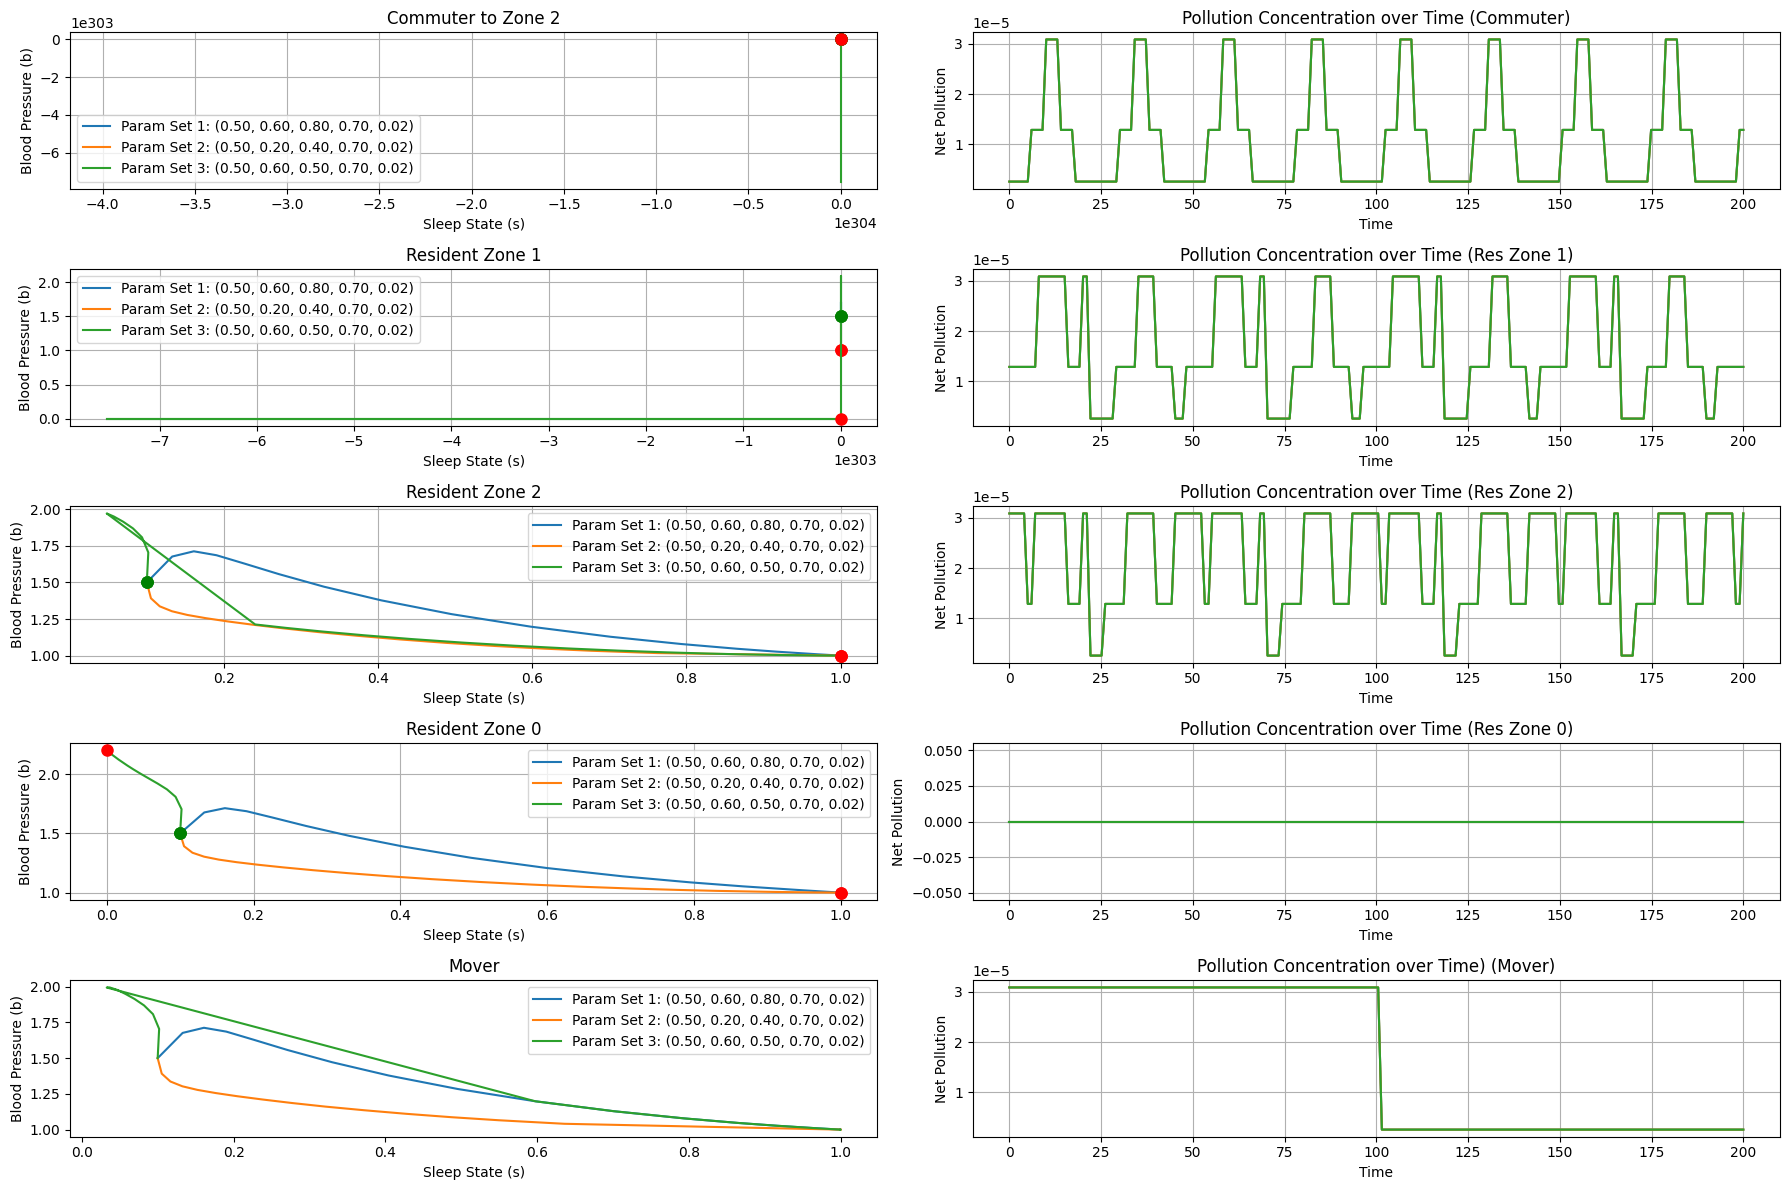

Initial Conditions Set 2: b0=0.8, s0=1.2, E0=0


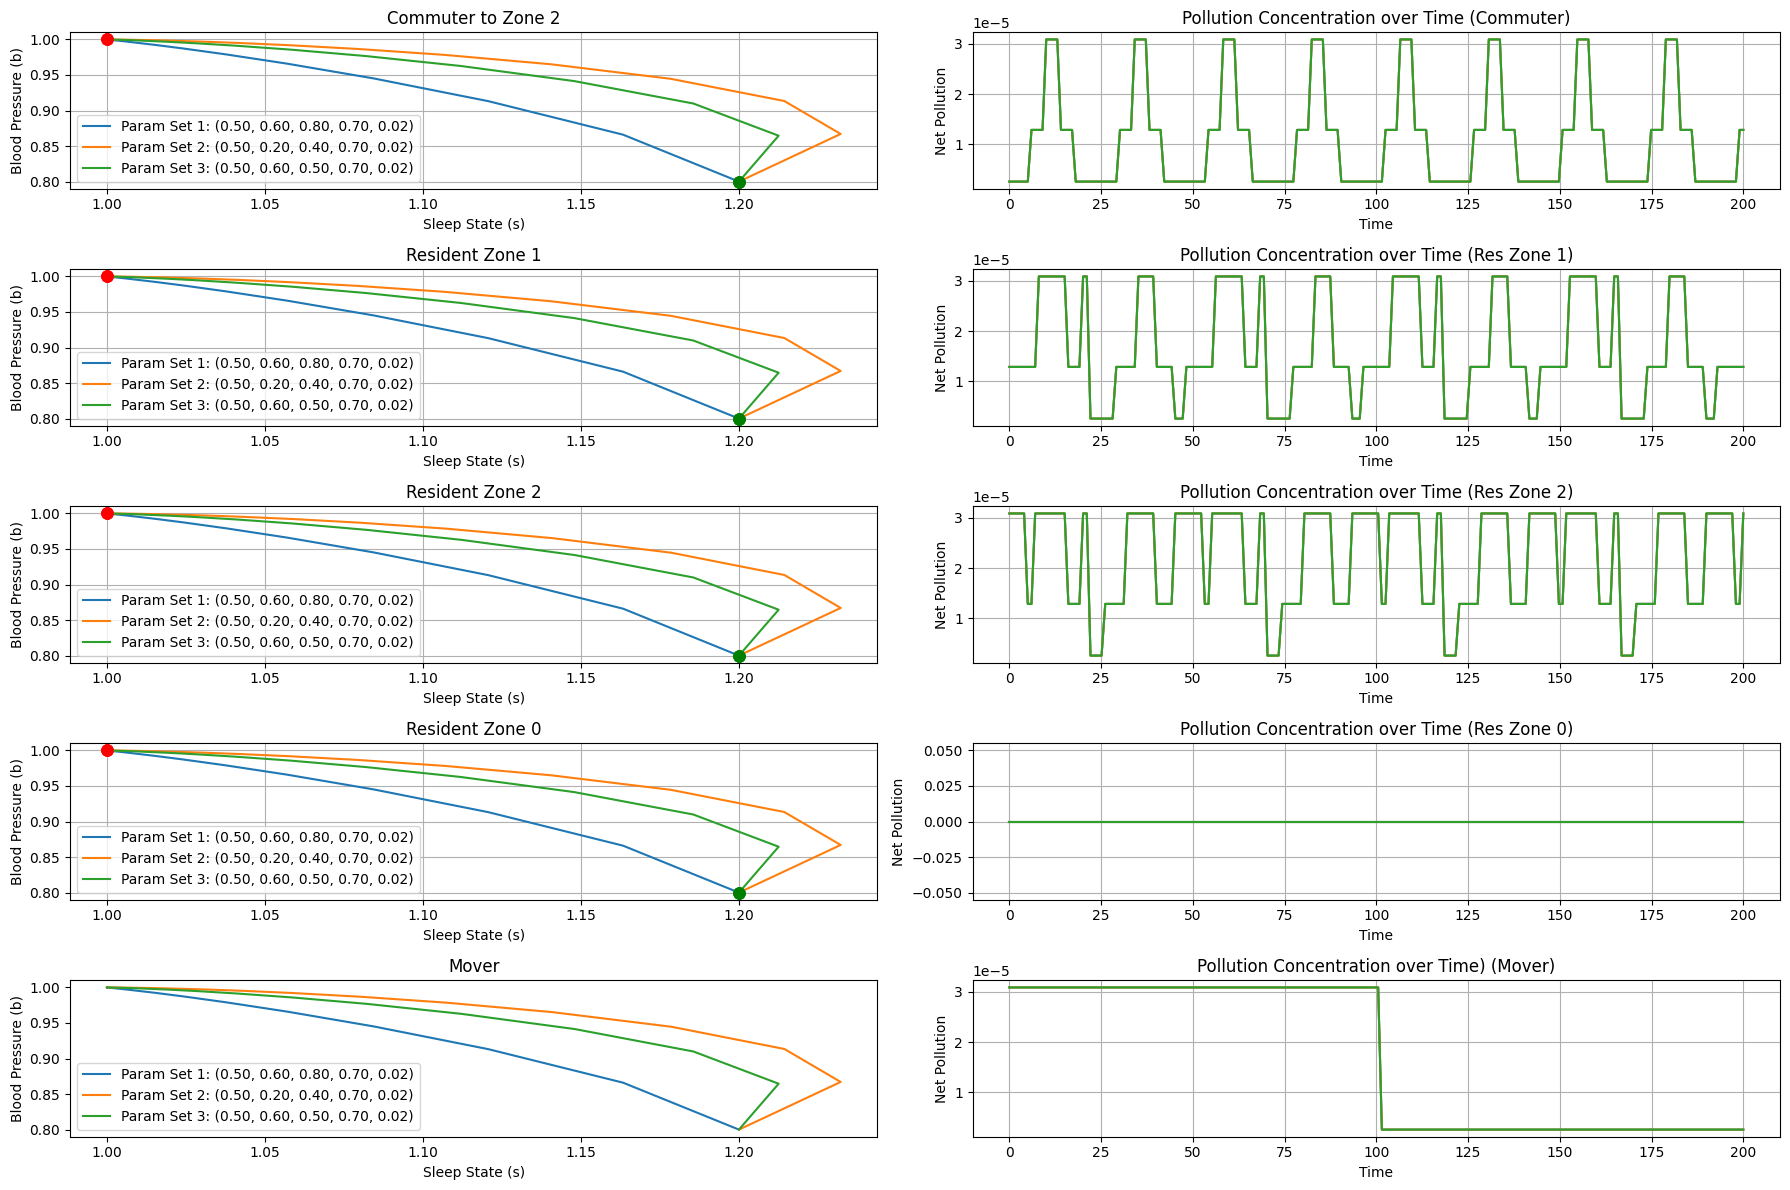

Initial Conditions Set 3: b0=0.3, s0=1.4, E0=0


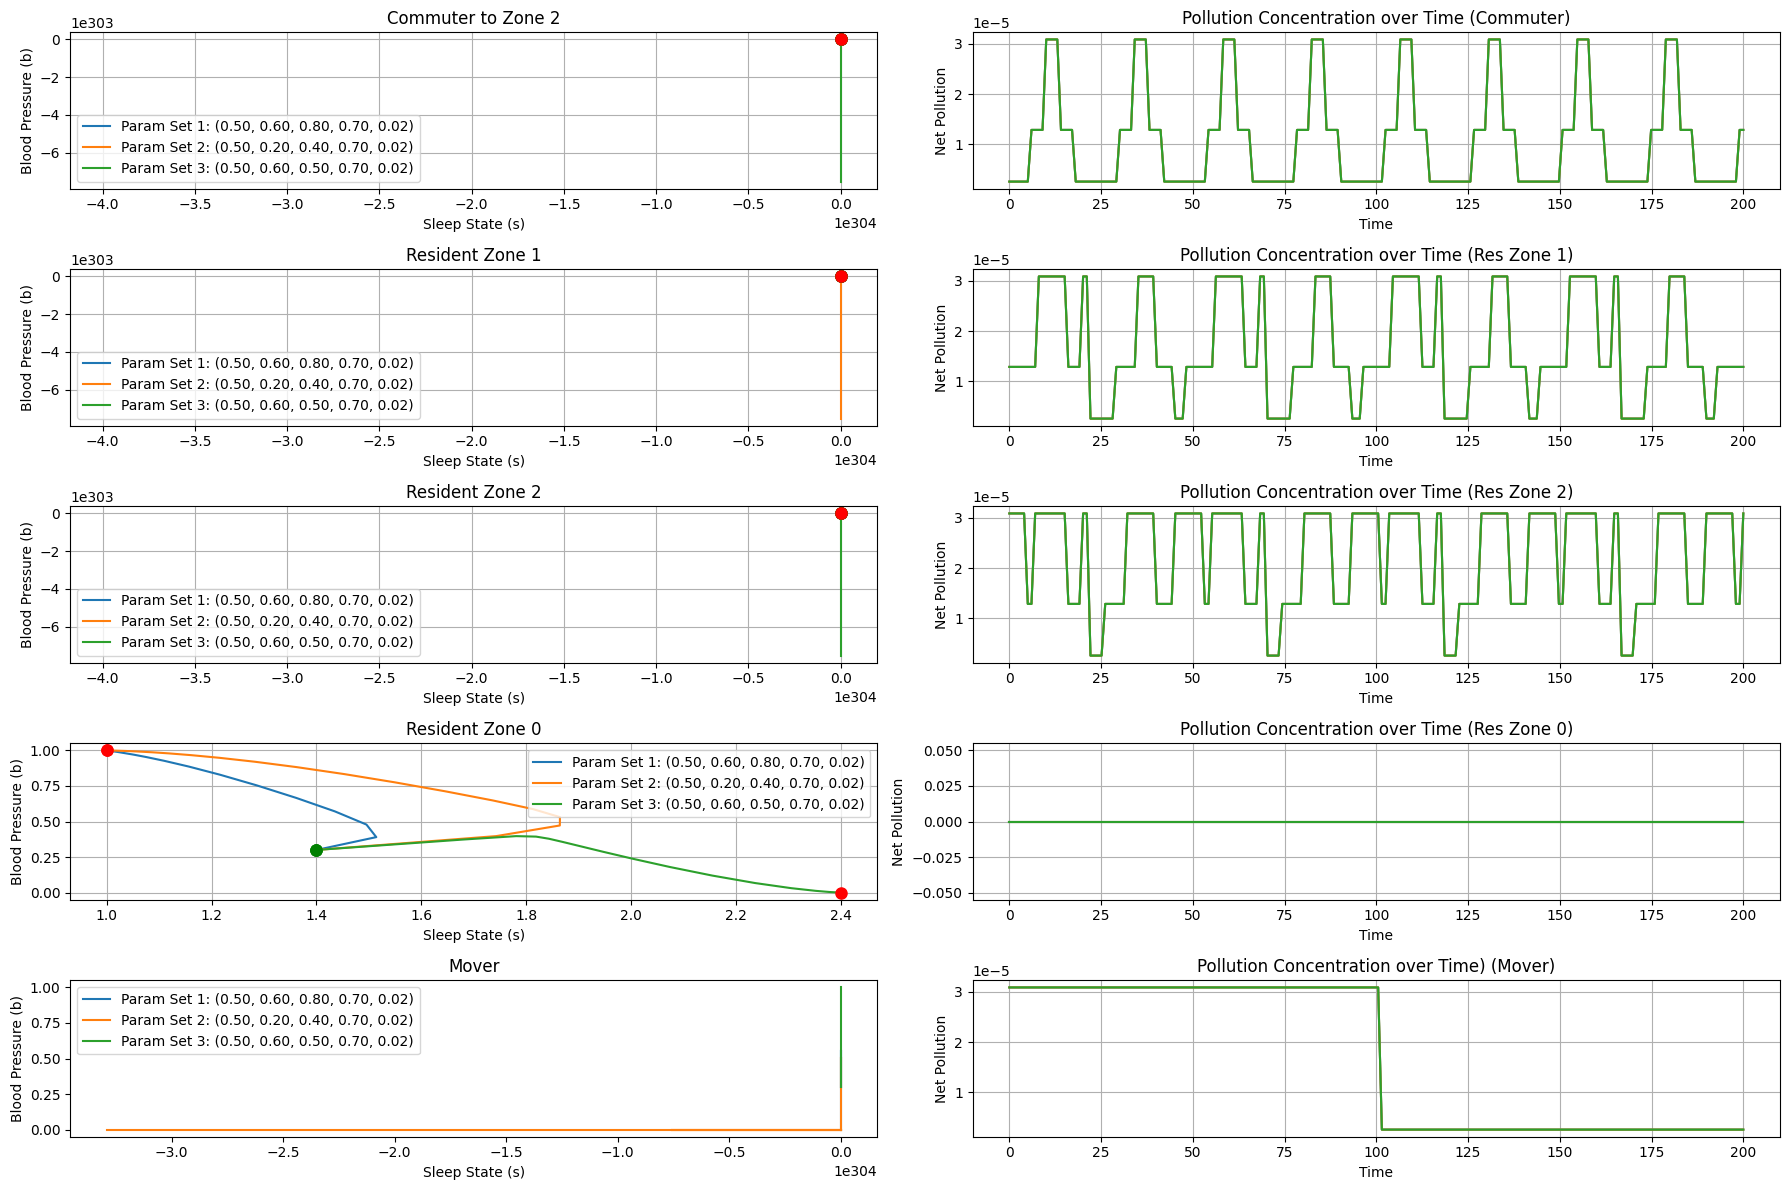

Initial Conditions Set 4: b0=0.5, s0=0.5, E0=0


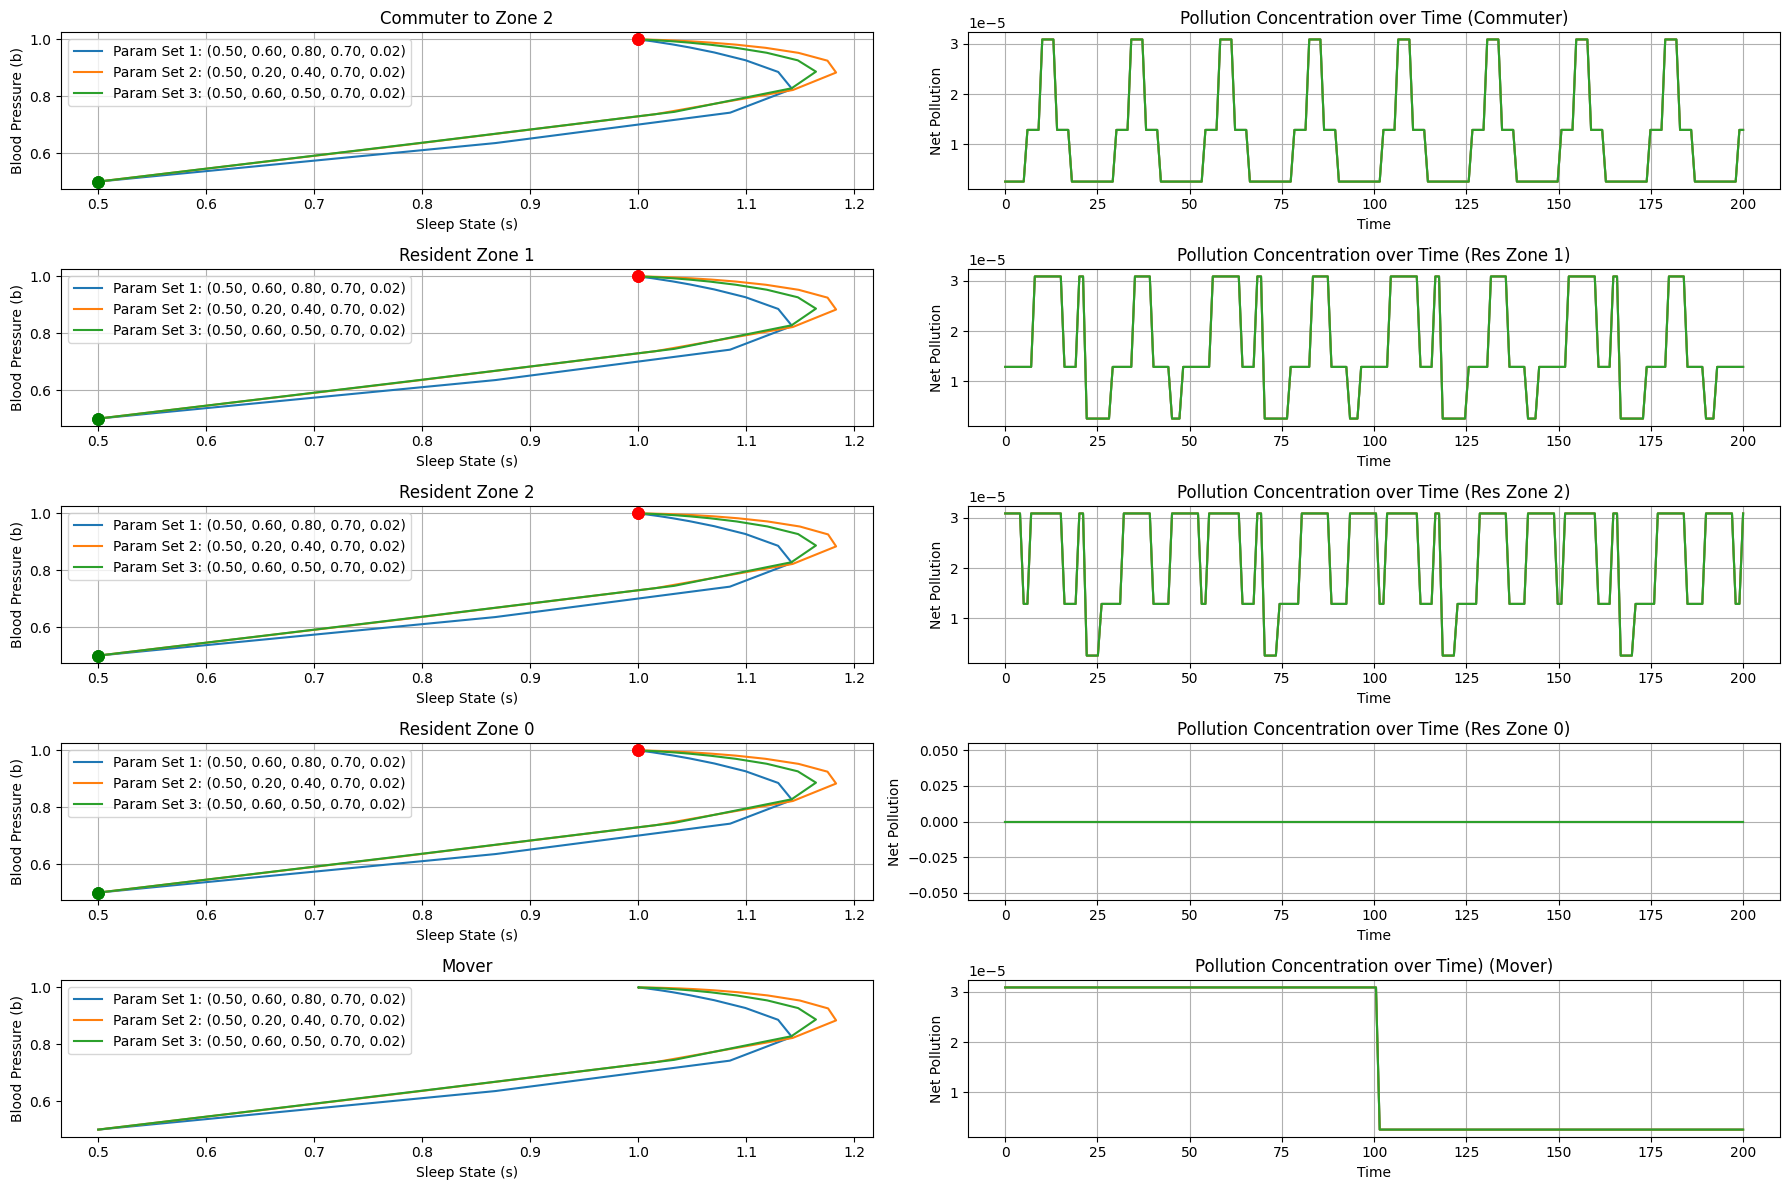

Initial Conditions Set 5: b0=1, s0=1, E0=0


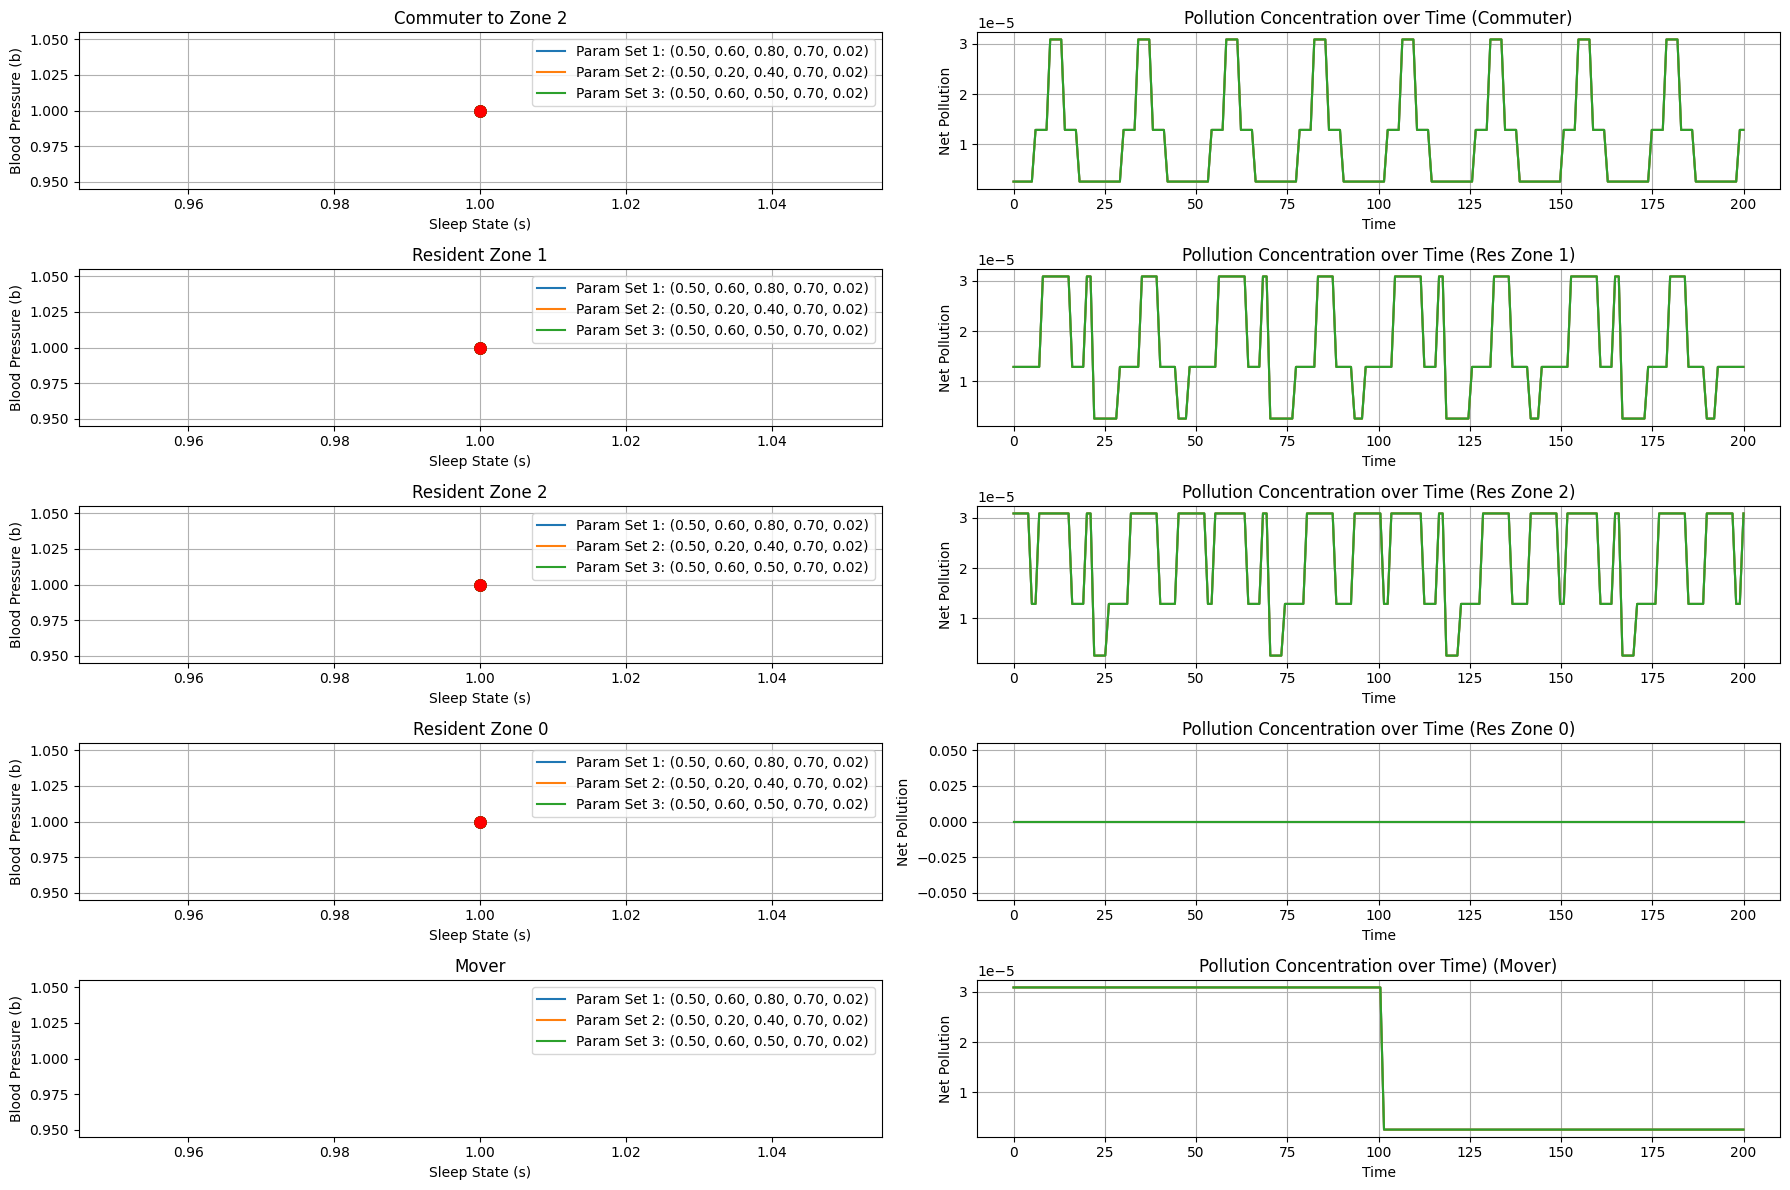

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from google.colab import files
import random

# Define the ODE system
def system(y, t, params, pollution_history):
    b, s, E = y
    λ, δ, γ, ε, μ = params

     # Check for zero values to prevent division by zero errors
    if b == 0 or s == 0:
        return [0, 0, 0]  # Return zeros if b or s is zero

    # Initialize drift_data outside the function to ensure it's available across calls
    if t == 0:
        system.drift_data = {'λ_drift': λ, 'γ_drift': γ}  # Using system.drift_data
    else:
        #High levels of pollution are associated with a 4% increase in chance for hypertension
        system.drift_data['λ_drift'] = system.drift_data['λ_drift'] + 0.04 * E  # Using system.drift_data
         #High levels of pollution are associated with a 3% decrease in sleep quality
        system.drift_data['γ_drift'] = system.drift_data['γ_drift'] - 0.03 * E


    # Access pollution history at the current time step
    p_t = pollution_history[int(t)] if int(t) < len(pollution_history) else pollution_history[-1]


    '''
    ε_drift = ε + 0.04 * E
    ρ_drift = ρ + 0.04 * E
    μ_drift = μ + 0.04 * E
    '''

    db_dt = system.drift_data['λ_drift'] * b * (1 - b) + δ * b * (1 - s)**3
    ds_dt = system.drift_data['γ_drift'] * s * (1 - s) + ε * s * (1 - b)
    dE_dt = p_t - μ * E

    return [db_dt, ds_dt, dE_dt]

# Initial conditions
# Initial conidition sets
y0_sets =[[1.5,.10,0],[.8,1.2,0],[.3,1.4,0],[.5,.5,0], [1,1,0] ]

# Parameter sets to test
param_sets = [
    [0.5, 0.6, .8, 0.7, 0.02  ],  # Parameters that induced 4 steady states w/pollution
    [0.5, 0.2, 0.4, 0.7, 0.02 ],   # parameters that induced 5 steady states w/ pollution
    [0.5, 0.6, 0.5, 0.7, 0.02 ],  # parameters that induced 6 steady states w/ pollution
]

# Time span
t = np.linspace(0, 200, 200)

mover = np.zeros(len(t))

for i in range(len(t)):
  if i <= 100:
       mover[i] = 2
  elif i > 100 & i <= 150:
       mover[i] = 0
  else:
       mover[i] = 1

commuter = np.array([0,0,0,0,0,0,1,1,1,1,2,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,1,1,1,1,0,0,0,0,0,0])
resident_zone_1 = np.array([1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,0,0,0])
resident_zone_2 = np.array([2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2])
pattern_length = len(commuter)

# Calculate the number of repetitions needed to reach a length of 200
num_repetitions = len(t) // pattern_length

# Create the expanded array by repeating the pattern
expanded_commuter = np.tile(commuter, num_repetitions)
expanded_resident_zone_1 = np.tile(resident_zone_1, num_repetitions)
expanded_resident_zone_2 = np.tile(resident_zone_2, num_repetitions)

# Append the remaining elements from the pattern if necessary
remaining_elements = len(t) % pattern_length
remaining_commuter = commuter[:remaining_elements]
remaining_resident_zone_1 = resident_zone_1[:remaining_elements]
remaining_resident_zone_2 = resident_zone_2[:remaining_elements]
if remaining_elements > 0:
    expanded_commuter = np.concatenate((expanded_commuter, commuter[:remaining_elements]))
    expanded_resident_zone_1 = np.concatenate((expanded_resident_zone_1, resident_zone_1[:remaining_elements]))
    expanded_resident_zone_2 = np.concatenate((expanded_resident_zone_2, resident_zone_2[:remaining_elements]))


# Number of neighborhoods (pollution sources)
num_neighborhoods = 3

# Generate random pollution concentrations for each neighborhood over time
#array of the avg ambient pollution for each type of neighborhood
pollution_concentrations = [.000001, .000005, .000012] # Example random concentrations
pollution_history_com = np.zeros(len(t))
pollution_history_res2 = np.zeros(len(t))
pollution_history_res1 = np.zeros(len(t))
pollution_history_res0 = np.zeros(len(t))
pollution_history_mover = np.zeros(len(t))

for _t in range(len(t)):
  # Ensure _t is within the bounds of commuter and resident_zone arrays
  commuter_index = expanded_commuter[_t % len(expanded_commuter)] if _t < len(t) else commuter[-1]
  resident_zone_2_index = int(expanded_resident_zone_2[_t % len(expanded_resident_zone_2)]) if _t < len(t) else int(expanded_resident_zone_2[-1])
  resident_zone_1_index = int(expanded_resident_zone_1[_t % len(expanded_resident_zone_1)]) if _t < len(t) else int(expanded_resident_zone_1[-1])
  mover_index = int(mover[_t])

  if _t == 0:
    pollution_history_com[_t] = 0.6 *13 * .33 * pollution_concentrations[commuter_index]
    pollution_history_res2[_t] = 0.6 *13 * .33 * pollution_concentrations[resident_zone_2_index]
    pollution_history_res1[_t] = 0.6 *13 * .33 * pollution_concentrations[resident_zone_1_index]
    pollution_history_mover[_t] = 0.6 *13 * .33 * pollution_concentrations[mover_index]
  else:
    pollution_history_com[_t] = ( 0.6 *13 * .33 * pollution_concentrations[commuter_index]) # changed to pollution_history_com from pollution_history
    pollution_history_res2[_t] = (0.6 *13 * .33 * pollution_concentrations[resident_zone_2_index]) # changed to pollution_history_res2 from pollution_history
    pollution_history_res1[_t] = (0.6 *13 * .33 * pollution_concentrations[resident_zone_1_index]) # changed to pollution_history_res1 from pollution_history
    pollution_history_mover[_t] = (0.6 *13 * .33 * pollution_concentrations[mover_index]) # changed to pollution_history_mover from pollution_history

#Example pollution accumulation
# pollution_concentrations = np.zeros((num_neighborhoods, len(t)))
# for i in range(num_neighborhoods):
#   for j in range(len(t)):
#     pollution_concentrations[i][j] = .6 * 13 * 0.33 * .000005 * t[j] + np.random.uniform(0, .001)


# Iterate through initial conditions
for i, y0 in enumerate(y0_sets):
    b0, s0, E0 = y0
    print(f"Initial Conditions Set {i+1}: b0={b0}, s0={s0}, E0={E0}")

    fig, axes = plt.subplots(5, 2, figsize=(18, 12)) # Increased figure size for better visualization

    for j, params in enumerate(param_sets):
            # Initialize drift_data dictionary for each parameter set and initial condition
            drift_data = {}
      # Iterate through neighborhoods
            # Solve the ODE system with accumulated pollution for commuter
            solution = odeint(system, y0, t, args=(params, pollution_history_com))
            b, s, E = solution.T

            #Solve the ODE system with accumulated pollution for resident of zone 1
            solution_1 = odeint(system, y0, t, args=(params, pollution_history_res1))
            b_1, s_1, E_1 = solution_1.T

            #Solve the ODE system with accumulated pollution for resident of zone 2
            solution_2 = odeint(system, y0, t, args=(params, pollution_history_res2))
            b_2, s_2, E_2 = solution_2.T

            #Solve the ODE system with accumulated pollution for resident of zone 0
            solution_0 = odeint(system, y0, t, args=(params, pollution_history_res0))
            b_0, s_0, E_0 = solution_0.T

            #Solve the ODE System for mover
            solution_m = odeint(system, y0, t, args=(params, pollution_history_mover))
            b_m, s_m, E_m = solution_m.T

            param_str = ", ".join([f"{p:.2f}" for p in params])
            label = f'Param Set {j+1}: ({param_str})'

            # Plotting with paired axes
            axes[0, 0].plot(s, b, label=label)
            axes[0, 0].set_xlabel('Sleep State (s)')
            axes[0, 0].set_ylabel('Blood Pressure (b)')
            axes[0, 0].set_title('Commuter to Zone 2')
            axes[0, 0].legend()
            axes[0, 0].grid(True)


            axes[1, 0].plot(s_1, b_1, label=label)
            axes[1, 0].set_xlabel('Sleep State (s)')
            axes[1, 0].set_ylabel('Blood Pressure (b)')
            axes[1, 0].set_title('Resident Zone 1')
            axes[1, 0].legend()
            axes[1, 0].grid(True)

            axes[2, 0].plot(s_2, b_2, label=label)
            axes[2, 0].set_xlabel('Sleep State (s)')
            axes[2, 0].set_ylabel('Blood Pressure (b)')
            axes[2, 0].set_title('Resident Zone 2')
            axes[2, 0].legend()
            axes[2, 0].grid(True)

            axes[3,0].plot(s_0,b_0, label=label)
            axes[3,0].set_xlabel('Sleep State (s)')
            axes[3,0].set_ylabel('Blood Pressure (b)')
            axes[3,0].set_title('Resident Zone 0')
            axes[3,0].legend()
            axes[3,0].grid(True)

            axes[4,0].plot(s_m, b_m, label=label)
            axes[4,0].set_xlabel('Sleep State (s)')
            axes[4,0].set_ylabel('Blood Pressure (b)')
            axes[4,0].set_title('Mover')
            axes[4,0].legend()

            axes[0,1].plot(t,pollution_history_com, label = label)
            axes[0,1].set_xlabel("Time")
            axes[0,1].set_ylabel("Net Pollution")
            axes[0,1].set_title("Pollution Concentration over Time (Commuter)")
            axes[0,1].grid(True)

            axes[1,1].plot(t,pollution_history_res1, label = label)
            axes[1,1].set_xlabel("Time")
            axes[1,1].set_ylabel("Net Pollution")
            axes[1,1].set_title("Pollution Concentration over Time (Res Zone 1)")
            axes[1,1].grid(True)

            axes[2,1].plot(t,pollution_history_res2, label = label)
            axes[2,1].set_xlabel("Time")
            axes[2,1].set_ylabel("Net Pollution")
            axes[2,1].set_title("Pollution Concentration over Time (Res Zone 2)")
            axes[2,1].grid(True)

            axes[3,1].plot(t,pollution_history_res0, label = label)
            axes[3,1].set_xlabel("Time")
            axes[3,1].set_ylabel("Net Pollution")
            axes[3,1].set_title("Pollution Concentration over Time (Res Zone 0)")
            axes[3,1].grid(True)

            axes[4,1].plot(t, pollution_history_mover, label = label)
            axes[4,1].set_xlabel("Time")
            axes[4,1].set_ylabel("Net Pollution")
            axes[4,1].set_title("Pollution Concentration over Time) (Mover)")
            axes[4,1].grid(True)

            # Annotate the initial and end points for the 'Commuter to Zone 2' plot
            axes[0, 0].plot(s[0], b[0], 'go', markersize=8)  # Green circle for start
            axes[0, 0].plot(s[-1], b[-1], 'ro', markersize=8) # Red circle for end

            # Repeat annotation adjustments for other subplots (axes[1, 0], axes[2, 0], etc.)
            axes[1, 0].plot(s_1[0], b_1[0], 'go', markersize=8)
            axes[1, 0].plot(s_1[-1], b_1[-1], 'ro', markersize=8)

            axes[2, 0].plot(s_2[0], b_2[0], 'go', markersize=8)
            axes[2, 0].plot(s_2[-1], b_2[-1], 'ro', markersize=8)

            axes[3,0].plot(s_0[0],b_0[0], 'go', markersize=8)
            axes[3,0].plot(s_0[-1],b_0[-1], 'ro', markersize=8)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


In [ ]:
# prompt: <ipython-input-11-2e6f2a795a90>:148: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
#   solution_2 = odeint(system, y0, t, args=(params, pollution_history_res2)) How do I fix this?

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import random

# Define the ODE system
def system(y, t, params, pollution_history):
    b, s, E = y
    λ, δ, ϕ, γ, ε, ρ, μ, theta  = params

    # Access pollution history at the current time step
    p_t = pollution_history[int(t)] if int(t) < len(pollution_history) else pollution_history[-1]

    db_dt = λ * b * (1 - b) + δ * b * (1 - s)**3 + ϕ * E
    ds_dt = γ * s * (1 - s) + ε * s * (1 - b) - ρ * E
    dE_dt = theta * p_t - μ * E

    return [db_dt, ds_dt, dE_dt]

# ... (rest of your code)

#The issue was with the way you were indexing your pollution_history within the system function.
#You were using int(t), which could lead to out-of-bounds errors if your t values are not integers and were greater than the length of pollution_history
#The code below clips t to ensure it does not exceed pollution history length.

# Iterate through initial conditions
for i, y0 in enumerate(y0_sets):
    #... (rest of your code)
    for j, params in enumerate(param_sets):
        # Iterate through neighborhoods
        # Solve the ODE system with accumulated pollution
        solution = odeint(system, y0, t, args=(params, pollution_history), full_output=1) #added full_output=1 to capture more info if odeint still has issues

        #Check for errors
        if solution[1]['message'] != 'Integration successful.':
            print(f"Error during integration for initial conditions {i+1} parameter set {j+1}: {solution[1]['message']}")
            continue

        b, s, E = solution[0].T

        # ... (rest of your plotting code)
